## Przygotowanie danych


### Wczytanie danych csv 

In [5]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.1  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
txt <- read_file('spec-wyniki.csv')
txt <- gsub("\"", "", gsub("\",\"", "|", txt))


df <- read_delim(txt, delim="|", skip=1,
                 col_names=c("Data",
                             "Metodyka",
                             "Dl_projektu",
                             "Udzial_testerow",
                             "Skojarzenia_spec",
                             "Spisanie_wymagan",
                             "Os_odpowiedzialna",
                             "L_stron",
                             "Waznosc_spec",
                             "Cechy_spec",
                             "Wady_spec",
                             "Uwagi"
                             ))
#                             ),
#                  col_types=cols(
#                      Data=col_datetime(format="%Y/%m/%d %I:%M:%S %p %Z"),
#                      Dl_projektu=col_factor(levels=c('do pół roku', '0,5 - 1 roku', '1-3 lata', 'powyżej 3 lat'))))

### Normalizacja typu i wartości zmiennych

#### Data

In [7]:
df$Data <- parse_datetime(df$Data, format="%Y/%m/%d %I:%M:%S %p %Z")

#### Metodyka

In [8]:
# count(df, Metodyka)

df <- df %>%
    mutate(Metodyka_norm = case_when(
        Metodyka == "agile’owej" | Metodyka == "scrum" | Metodyka == "kanban" |
            Metodyka == "ni to agile ni to waterfall, ale bliżej mu do iteracyjnego podejścia" | 
            grepl("scrum.*but", df$Metodyka) ~ "iteracyjne",
        Metodyka == "watefallowej" | Metodyka == "watefallowej;Waterfall, który udaje agile" | 
            Metodyka == "V" ~ "sekwencyjne",
        grepl("agile’owej;watefallowej", df$Metodyka) ~ "iteracyjne i sekwencyjne",
        TRUE ~ "inne"
    ))

df$Metodyka_norm <- parse_factor(df$Metodyka_norm)

# class(df$Metodyka_norm)
# df$Metodyka_norm


# count(df, Metodyka_norm)

#### Długość projektu

In [9]:
# df <- df %>%
#     mutate(Dl_projektu_num = case_when(
#         Dl_projektu == 'do pół roku'  ~ 1,
#         Dl_projektu == '0,5 - 1 roku' ~ 2,
#         Dl_projektu == '1-3 lata' ~ 3,
#         TRUE ~ 4
#     ))


#alternatywnie tak można zmienić typ danych
project_length_levels <- c('do pół roku', '0,5 - 1 roku', '1-3 lata', 'powyżej 3 lat')
df$Dl_projektu_norm <- parse_factor(df$Dl_projektu, levels = project_length_levels)

#### Udział testerów

In [10]:
# df$Udzial_testerow <- gsub("tak, brali udział w definiowaniu wymagań", 
#                              "pełny", 
#                              df$Udzial_testerow)
# df$Udzial_testerow <- gsub("tak, recenzowali gotową specyfikację i mogli wnosić swoje uwagi", 
#                              "recenzja", 
#                              df$Udzial_testerow)
# df$Udzial_testerow <- gsub("tak, mieli wgląd do specyfikacji już na samym początku i na jej podstawie mogli stworzyć strategię i plan testów, ale nie mieli wpływu na zmianę samego dokumentu", 
#                              "wgląd przed testami", 
#                              df$Udzial_testerow)
# df$Udzial_testerow <- gsub("nie, mieli dostęp do specyfikacji, gdy oprogramowanie było w trakcie implementacji, albo nawet po jej zakończeniu", 
#                              "wgląd w czasie testów", 
#                              df$Udzial_testerow)
# df$Udzial_testerow <- gsub("nie i nie mieli dostępu do specyfikacji", 
#                              "brak dostępu", 
#                              df$Udzial_testerow)
# df$Udzial_testerow <- gsub("nie, bo nie było specyfikacji", 
#                              "brak specyfikacji", 
#                              df$Udzial_testerow)

df <- df %>% mutate(Udzial_testerow_norm = case_when(
    Udzial_testerow == "tak, brali udział w definiowaniu wymagań"
        ~ "pełny",
    Udzial_testerow == "tak, recenzowali gotową specyfikację i mogli wnosić swoje uwagi" 
        ~ "recenzja",
    Udzial_testerow == "tak, mieli wgląd do specyfikacji już na samym początku i na jej podstawie mogli stworzyć strategię i plan testów, ale nie mieli wpływu na zmianę samego dokumentu" 
        ~ "wgląd przed testami",
    Udzial_testerow == "nie, mieli dostęp do specyfikacji, gdy oprogramowanie było w trakcie implementacji, albo nawet po jej zakończeniu" 
        ~ "wgląd w czasie testów",
    Udzial_testerow == "nie i nie mieli dostępu do specyfikacji" 
        ~ "brak dostępu", 
    Udzial_testerow == "nie, bo nie było specyfikacji" 
        ~ "brak specyfikacji",
    Udzial_testerow == "Coś między dwa a trzy - nie tyle do recenzji, ile był dostęp dość szybko i uwagi, które się nasunęły w czasie projektowania strategii i planów były brane pod uwagę."
        ~ "recenzja",
    Udzial_testerow == "gdy się zainteresowali, to mogli na cośwplynąć" 
        ~ "recenzja",
    Udzial_testerow == "specyfikacja częściowo dostępna na początku, zmienna i głównie rozszerzana w trakcie trwania projektu" 
        ~ "wgląd przed testami",
    Udzial_testerow == "wgląd od początku, ale bez wpływu na zmiany; natomiast klient zmiany wprowadzał cały czas, także już po oddaniu projektu!! " 
        ~ "wgląd przed testami",
    Udzial_testerow == "nie brali udziału w fazie projektowania wymagań, ale mieli pełny dostęp do specyfikacji w czasie testów"
        ~ "wgląd w czasie testów",
    TRUE ~ "inne"
    ))

testers_contribution_levels <- c("pełny", "recenzja", "wgląd przed testami", "wgląd w czasie testów", "brak dostępu", "brak specyfikacji", "inne")
df$Udzial_testerow_norm <- parse_factor(df$Udzial_testerow_norm, levels = testers_contribution_levels)

count(df, Udzial_testerow_norm)
# class(df$Udzial_testerow_norm)

Udzial_testerow_norm,n
pełny,9
recenzja,24
wgląd przed testami,12
wgląd w czasie testów,14
brak dostępu,3
brak specyfikacji,8
inne,3


#### Skojarzenia

In [11]:
# TODO

#### Spisywanie wymagań

In [12]:
# df$Spisanie_wymagan <- gsub("tak, na samym początku", 
#                             "na początku", df$Spisanie_wymagan)
# df$Spisanie_wymagan <- gsub("tak, stopniowo w trakcie projektu \\(np. w postaci user stories\\)", 
#                             "w trakcie", df$Spisanie_wymagan)
# df$Spisanie_wymagan <- gsub("tak, na samym początku, ale później często się zmieniały", 
#                             "na początku, ale się zmieniały", df$Spisanie_wymagan)
# df$Spisanie_wymagan <- gsub("częściowo były spisywane, ale większość była przekazywana ustnie", 
#                             "częściowo", df$Spisanie_wymagan)
# df$Spisanie_wymagan <- gsub("nie, były tylko ustne ustalenia", 
#                             "niespisane", df$Spisanie_wymagan)

df <- mutate(df, Spisanie_wymagan_norm = case_when(
    Spisanie_wymagan == "tak, na samym początku" ~ "na początku",
    Spisanie_wymagan == "tak, stopniowo w trakcie projektu (np. w postaci user stories)" ~ "w trakcie",
    Spisanie_wymagan == "tak, na samym początku, ale później często się zmieniały" ~ "na początku, ale się zmieniały",
    Spisanie_wymagan == "częściowo były spisywane, ale większość była przekazywana ustnie" 
        | grepl("zęściowo spisane", df$Spisanie_wymagan) ~ "częściowo",
    Spisanie_wymagan == "nie, były tylko ustne ustalenia" ~ "niespisane",
#     TRUE ~ as.character(df$Spisanie_wymagan)
    TRUE ~ "inne"
))

#TODO nazwa zmiennej
writing_specification_levels <- c("na początku", "na początku, ale się zmieniały", "w trakcie", "częściowo", "niespisane", "inne")
df$Spisanie_wymagan_norm <- parse_factor(df$Spisanie_wymagan_norm, levels = writing_specification_levels)

# df$Spisanie_wymagan_norm
count(df, Spisanie_wymagan_norm)

Spisanie_wymagan_norm,n
na początku,10
"na początku, ale się zmieniały",26
w trakcie,21
częściowo,11
niespisane,3
inne,2


#### Osoba odpowiedzialna

In [13]:
# df$Os_odpowiedzialna <- gsub("tak, była to osoba z biznesu", 
#                              "biznes", 
#                              df$Os_odpowiedzialna)
# df$Os_odpowiedzialna <- gsub("tak, była to osoba z zespołu programistów", 
#                              "programista", 
#                              df$Os_odpowiedzialna)
# df$Os_odpowiedzialna <- gsub("tak, była to osoba z zespołu testerów", 
#                              "tester", 
#                              df$Os_odpowiedzialna)
# df$Os_odpowiedzialna <- gsub("nie, cały zespół był odpowiedzialny za utrzymywanie specyfikacji", 
#                              "zespół", 
#                              df$Os_odpowiedzialna)
# df$Os_odpowiedzialna <- gsub("nie, nikt nie był odpowiedzialny i przez to specyfikacja po jakimś czasie stawała się nieaktualna", 
#                              "nikt", 
#                              df$Os_odpowiedzialna)

# TODO zdecyduje sie na jeden sposob: albo raz deklaruje poziomy jak tu, albo dwa razy te wartosci podaje

df <- mutate(df, Os_odpowiedzialna_norm = case_when(
    Os_odpowiedzialna == "tak, była to osoba z biznesu" 
        | Os_odpowiedzialna == "analityk"
        | Os_odpowiedzialna == "analitycy"
        | Os_odpowiedzialna == "Tak, był to Biznes Analityk :) "
        | Os_odpowiedzialna == "tak, PO"
        | Os_odpowiedzialna == "tak, była to osoba z zespołu analityków"
        ~ "biznes",
    Os_odpowiedzialna == "tak, była to osoba z zespołu programistów" 
        ~ "programista",
    Os_odpowiedzialna == "tak, była to osoba z zespołu testerów" 
        | grepl("tester.*poczuł.*się", df$Os_odpowiedzialna, ignore.case=TRUE)
        ~ "tester",
    Os_odpowiedzialna == "nie, cały zespół był odpowiedzialny za utrzymywanie specyfikacji" 
        ~ "zespół",
    Os_odpowiedzialna == "nie, nikt nie był odpowiedzialny i przez to specyfikacja po jakimś czasie stawała się nieaktualna" 
        ~ "nikt",
    Os_odpowiedzialna == "Analityk i programiści"
        | Os_odpowiedzialna == "analityk i architekt"
        ~ "biznes i programista",
    TRUE ~ "inne"
))

spec_responsibility_levels <- c("biznes", "programista", "tester", "zespół", "nikt", "biznes i programista", "inne")
df$Os_odpowiedzialna_norm <- parse_factor(df$Os_odpowiedzialna_norm, levels = spec_responsibility_levels)

count(df, Os_odpowiedzialna_norm)
# df %>% select(Os_odpowiedzialna_norm, Os_odpowiedzialna) %>% filter(Os_odpowiedzialna_norm == "inne")

Os_odpowiedzialna_norm,n
biznes,30
programista,6
tester,5
zespół,7
nikt,15
biznes i programista,2
inne,8


#### Liczba stron

In [14]:
# df$L_stron <- gsub("nie miałem(am) dostępu do specyfikacji",
#                   "brak dostępu",
#                   df$L_stron)
# df$L_stron <- gsub("nie było żadnej specyfikacji",
#                   "brak specyfikacji",
#                   df$L_stron)

df <- mutate(df, L_stron_norm = case_when(
    L_stron == "do pół strony"
        ~ "do pół strony",
    L_stron == "do 1 strony"
        ~ "do 1 strony",
    L_stron == "do 10 stron"
        | L_stron == "Licząc z mockupami to over 9000, sensownej treści max 2 strony"
        ~ "do 10 stron",
    L_stron == "powyżej 10 stron"
        | L_stron == "50"
        | L_stron == "43 str"
        | L_stron == "50-70 stron"
        | L_stron == "pojedyncze user story do okolo 1 strony, calosci aplikacji? moze w 100 stronach by się zamkneło ale prawd. wiecej"
        | L_stron == "Wielkość specyfikacji była zależne od zakresu, który opisywała; średnio około 10 - 30 stron"
        ~ "powyżej 10 stron",
    grepl("jir", df$L_stron, ignore.case = TRUE)
        | L_stron == "Cieżko powiedzieć. Wszystko było na Confluence Wiki"
        | L_stron == "trudno powiedzieć. od 1 do 300"
        | L_stron == "nigdy nie zbierałem sumarycznej ilości dokumentacji"
        ~ "trudno ocenić (np. jira)", 
    L_stron == "nie miałem(am) dostępu do specyfikacji"
        ~ "brak dostępu",
    L_stron == "nie było żadnej specyfikacji"
        ~ "brak specyfikacji",
    TRUE ~ "inne"
))


spec_length_levels <- c("do pół strony", "do 1 strony", "do 10 stron", "powyżej 10 stron", "trudno ocenić (np. jira)", "brak dostępu", "brak specyfikacji", "inne")
df$L_stron_norm <- parse_factor(df$L_stron_norm, levels = spec_length_levels)

select(df, L_stron_norm, L_stron) %>% filter(L_stron_norm == "inne")

count(df, L_stron_norm)

L_stron_norm,L_stron
inne,Prs
inne,róznie


L_stron_norm,n
do pół strony,5
do 1 strony,7
do 10 stron,9
powyżej 10 stron,34
trudno ocenić (np. jira),8
brak dostępu,1
brak specyfikacji,7
inne,2


#### Ważność specyfikacji

In [15]:
# df$Waznosc_spec <- gsub("tak, bez niej trudno byłoby na czas zakończyć projekt",
#                      "dobra",
#                      df$Waznosc_spec)
# df$Waznosc_spec <- gsub("specyfikacja była ważna szczególnie na początku projektu, ale w miarę jak projekt się rozwijał, wymagania się zmieniały i ostatecznie specyfikacja nie była aktualna i nikt na niej nie bazował",
#                      "nieaktualna",
#                      df$Waznosc_spec)
# df$Waznosc_spec <- gsub("nie, specyfikacja była złej jakości i wiele czasu było później poświęconego na dodatkowe ustalenia",
#                      "zła",
#                      df$Waznosc_spec)
# df$Waznosc_spec <- gsub("daliśmy radę bez specyfikacji ;)",
#                      "brak specyfikacji",
#                      df$Waznosc_spec)

df <- mutate(df, Waznosc_spec_norm = case_when(
        Waznosc_spec == "tak, bez niej trudno byłoby na czas zakończyć projekt"
            | Waznosc_spec == "Specyfikacja była aktualizowana, przypadki użycia również, projekt ciągle trwa i aktualizacja dokumentacji jest niezbędna do zachowania jakości aplikacji"
            | Waznosc_spec == "teoretycznie tak, w praktyce nie zawsze programiści/testerzy z niej korzystali; bazowali na historyjkach"
            | Waznosc_spec == "kluczowy - dobrze zrobiona ograniczała papierologię oraz pisanie funkcji na półkę i ego właściciela"
            | Waznosc_spec == "Tak, bez niej trudno jest prowadzić projekt i spełnić ustalone wymagania klienta"
            | Waznosc_spec == "ongoing project - bez jakieś postaci specyfikacji można było utonąć"
            ~ "niezbędna",
        Waznosc_spec == "specyfikacja była ważna szczególnie na początku projektu, ale w miarę jak projekt się rozwijał, wymagania się zmieniały i ostatecznie specyfikacja nie była aktualna i nikt na niej nie bazował" 
            ~ "potrzebna, ale nieaktualna",
        Waznosc_spec == "nie, specyfikacja była złej jakości i wiele czasu było później poświęconego na dodatkowe ustalenia"
            ~ "problematyczna, bo złej jakości",
        Waznosc_spec == "daliśmy radę bez specyfikacji ;)"
            ~ "brak specyfikacji",
        TRUE ~ "inne"
))

spec_importance_levels <- c("niezbędna", "potrzebna, ale nieaktualna", "problematyczna, bo złej jakości", "brak specyfikacji", "inne")
df$Waznosc_spec_norm <- parse_factor(df$Waznosc_spec_norm, levels = spec_importance_levels)

# select(df, Waznosc_spec_norm, Waznosc_spec) %>% filter(Waznosc_spec_norm == "inne")

count(df, Waznosc_spec_norm)

Waznosc_spec_norm,n
niezbędna,33
"potrzebna, ale nieaktualna",20
"problematyczna, bo złej jakości",7
brak specyfikacji,7
inne,6


#### Cechy specyfikacji

In [16]:
df <- mutate(df, Cechy_spec_norm = Cechy_spec)

df$Cechy_spec_norm <- gsub("Terminologia zawarta w specyfikacji jest spójna i zrozumiała",
                     "C_zrozumialosc",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja mówi co jest do zrobienia, a nie jak ma być to zrobione \\(brak implementacyjnych wskazówek\\)",
                     "C_deklaratywnosc",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja nie zawiera niejednoznacznych stwierdzeń",
                     "C_jednoznacznosc",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Jedno stwierdzenie zawiera tylko jedno wymaganie",
                     "C_pojedyncze_wymagania",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja zawiera wymagania opisane na różnym poziomie szczegółowości \\(np. cele biznesowe, opis usług żądanych od oprogramowania, opis wewnętrznej logiki biznesowej\\)",
                     "C_poz_szczegolowosci",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja jest kompletna - spisane zostały wszystkie wymagania, nie tylko funkcjonalne, ale też wydajnościowe, sprzętowe, dotyczące bezpieczeństwa, zgodności z prawem itp.",
                     "C_kompletnosc",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Spisane wymagania nie wykluczają siebie nawzajem",
                     "C_koherencja",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja zawiera wymagania dotyczące obsługi błędów i innych nieoczekiwanych zachowań systemu",
                     "C_obsluga_bledow",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja zawiera informacje na temat ograniczeń systemu",
                     "C_ograniczenia_systemu",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja zawiera jawny opis warunków, które nie muszą  być spełnione, bo nie są istotne lub klient tego nie chce  \\(np. rejestracja ma być bez captchy, aplikacja ma nie działać na IE\\)",
                     "C_cechy_nieistotne",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Wymagania są testowalne \\(m.in. wymagania są wolne od ogólnikowych stwierdzeń, np. dobry, wystarczający, odpowiedni, bezpieczny, szybki, łatwy itp.; są na tyle precyzyjne, że łatwo na ich podstawie określić kryteria sukcesu/spełnienia itp.\\)",
                     "C_testowalnosc",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja zawiera przykłady użycia zamiast ogólnych, abstrakcyjnych stwierdzeń, które tylko z pozoru są precyzyjne, a ich dokładna analiza wskazuje, że jest wiele przypadków brzegowych, dla których nie jest jednoznacznie opisane oczekiwane zachowanie systemu",
                     "C_przyklady_uzycia",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja jest poprawna gramatycznie, ortograficznie i interpunkcyjnie; nie ma w niej literówek",
                     "C_poprawnosc_jez",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja jest przejrzysta graficznie \\(m.in. podzielona jest na logiczne punkty/rozdziały/sekcje; formatowanie tekstu ułatwia czytanie: jest spójna czcionka, interlinia w obrębie sekcji, zachowane są odstępy między sekcjami itd.\\)",
                     "C_przejrzystosc_graf",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Jest aktualna.|Specyfikacja jest up to date", "C_aktualnosc", df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("jest|Musi istnieć", "C_egzystencja", df$Cechy_spec_norm)

#### Wady

In [17]:
# TODO

# count(df, Wady_spec)

#### Cechy specyfikacji

##### Utworzenie osobnych kolumn dla każdej cechy specyfikacji z osobna

In [18]:
a<-gsub("\' \'", ";", df$Cechy_spec_norm)
b<-gsub("\'", ";", a)
c <-strsplit(b, ";")
d <- unlist(c)
features <- sort(unique(d))
# print(features)

# class(features)

for (f in features){
#     print(f)
    df[f] <- grepl(f, df$Cechy_spec_norm, fixed=TRUE)
}

# df$C_poprawnosc_jez
# df

## Analiza

### Najistotniejsze cechy

In [19]:
# summarise(df, suma = sum(df$C_ograniczenia_systemu))
# ok, ale to trzeba zrobić dla każdej kolumny C_...

#dla każdej kolumny
# x<-select(df, C_aktualnosc:C_zrozumialosc)
# p <- sort(apply(x, 2, sum), decreasing=TRUE)
# p

#to samo ale z pipem!

features_importance <- df %>% 
    select(C_aktualnosc:C_zrozumialosc) %>% 
    apply(2, sum) %>% 
    sort(decreasing=TRUE)

# class(features_importance)
# features_importance

# alternatywny zapis by otrzymać feature importance:
# x<-select(df, C_aktualnosc:C_zrozumialosc)
# x2 <- sort(apply(x, 2, sum), decreasing=TRUE)
# x2


#Ważna metoda!!! zamienia vector na data frame!
fi <- cbind(read.table(text = names(features_importance)), features_importance)
colnames(fi) <- c("Cecha", "Liczba_wystapien")
class(fi)

fi


[1] "data.frame"

,Cecha,Liczba_wystapien
C_koherencja,C_koherencja,52
C_testowalnosc,C_testowalnosc,50
C_zrozumialosc,C_zrozumialosc,44
C_kompletnosc,C_kompletnosc,38
C_przyklady_uzycia,C_przyklady_uzycia,38
C_jednoznacznosc,C_jednoznacznosc,34
C_deklaratywnosc,C_deklaratywnosc,32
C_poz_szczegolowosci,C_poz_szczegolowosci,26
C_przejrzystosc_graf,C_przejrzystosc_graf,25
C_obsluga_bledow,C_obsluga_bledow,13


#### Wizualizacja

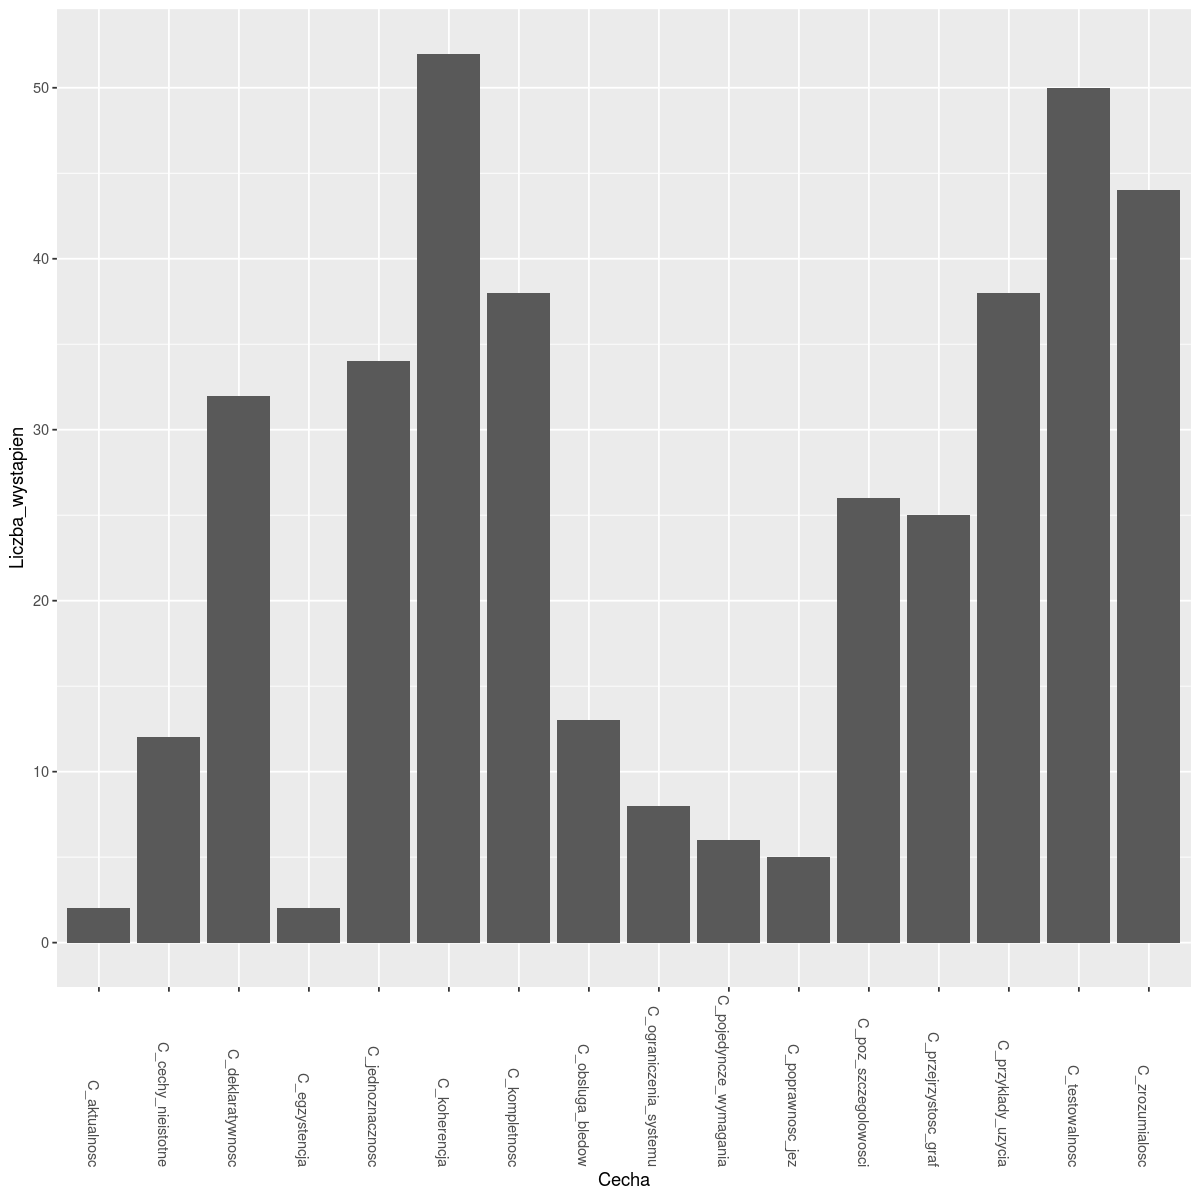

In [20]:
options(repr.plot.width=10, repr.plot.height=10)

f <- ggplot(data=fi, aes(x=Cecha, y=Liczba_wystapien))
f + geom_col() + theme(axis.text.x = element_text(angle = -90, hjust = 1)) 

# jeśli chcę z kolorami to geom_col(aes(fill=Cecha)) i wtedy jest dodatkowa legenda

In [21]:
nrow(df)/2

[1] 36.5

In [22]:
#--------------
# Analiza na piechotę

# sposób A
# sposób B
# l <- filter(select(df, C_aktualnosc:C_zrozumialosc), df$C_koherencja)
# lapply(l, sum)


#robiłam benchmark i wyszło, że szybciej liczy się dla sposobu A!!!

#-----------------------

#Tu chciałam popatrzeć na te wiersze, które spełniają dane warunki, fajne wykorzystanie one_of()

# df %>%
# filter(df$C_koherencja + df$C_testowalnosc + C_zrozumialosc + df$C_kompletnosc + df$C_przyklady_uzycia + df$C_jednoznacznosc > 3) %>%
# select(one_of('C_koherencja', 'C_testowalnosc', 'C_zrozumialosc', 'C_kompletnosc', 'C_przyklady_uzycia', 'C_jednoznacznosc'))

#Tutaj bardziej systematyczne podejście, które dla każdej kombinacji sprawdza liczbę wystąpień

# install.packages('gtools')
library(gtools)

x <- c('C_koherencja', 'C_testowalnosc', 'C_zrozumialosc', 'C_kompletnosc', 'C_przyklady_uzycia', 'C_jednoznacznosc')
p2 <- combinations(n=6,r=2,v=x)
p3 <- combinations(n=6,r=3,v=x)


comb <- data.frame(Kombinacja = character(0),
                   Liczba_wystapien = numeric(0),
                   stringsAsFactors=FALSE)


#TODO 
# można by zrobic comb2 dla dwoch cech, comb3 dla trzech, i polaczenie tych dwoch - comb2_3

for (row in 1:nrow(p2)) {
    num <- nrow(filter(df, df[p2[row,1]], df[p2[row,2]]))
    comb[row, 1] <- paste(p2[row,1], p2[row,2], sep="+")
    comb[row, 2] <- num
}

for (row in 1:nrow(p3)){
    num <- nrow(filter(df, df[p3[row,1]], df[p3[row,2]], df[p3[row,3]]))
    comb[row+nrow(p2), 1] <- paste(p3[row,1], p3[row,2], p3[row,3], sep="+")
    comb[row+nrow(p2), 2] <- num
}


comb

Kombinacja,Liczba_wystapien
C_jednoznacznosc+C_koherencja,25
C_jednoznacznosc+C_kompletnosc,12
C_jednoznacznosc+C_przyklady_uzycia,21
C_jednoznacznosc+C_testowalnosc,25
C_jednoznacznosc+C_zrozumialosc,22
C_koherencja+C_kompletnosc,26
C_koherencja+C_przyklady_uzycia,31
C_koherencja+C_testowalnosc,37
C_koherencja+C_zrozumialosc,30
C_kompletnosc+C_przyklady_uzycia,21


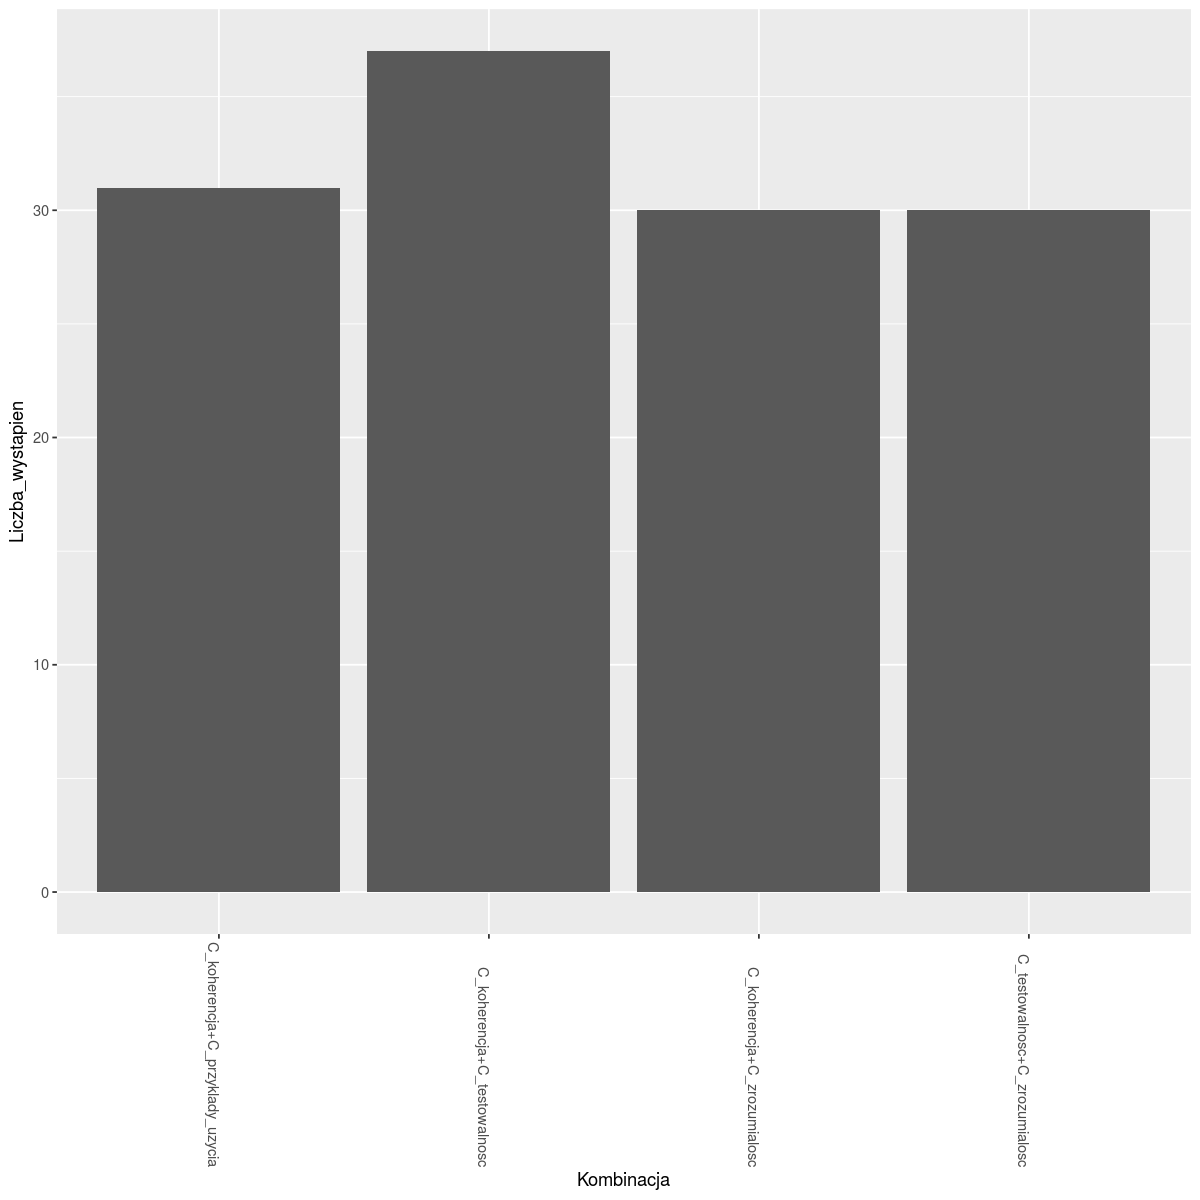

In [23]:
l_wystapien <- 28
mod_comb <- filter(comb, Liczba_wystapien>l_wystapien)

f <- ggplot(data=mod_comb, aes(x=Kombinacja, y=Liczba_wystapien))
f + geom_col() + theme(axis.text.x = element_text(angle = -90, hjust = 1)) 


Zdecydowana większość testerów wybrała koherencję, testowalność, zrozumiałość, kompletność i stosowanie przykładów użycia jako istotne cechy specyfikacji. Niektóre kombinacje cech były wybierane częściej niż inne. I tak ponad połowa respondentów za istotne uznało zarówno koherencję jak i testowalność. Natomiast wśród kombinacji trzech cech najczęściej (22 razy) pojawiły się koherencja, testowalność i przykłady użycia.

In [24]:
# write_delim(df, "df-cechy.csv", delim="|")

### Statystyka opisowa

#### Pomocnicze funkcje

In [25]:
pretty_col_name <- function(col_name){
    title <- strsplit(col_name, "_")[[1]]

    if (tail(title,1) != "norm"){
        title <- paste(title, collapse = " ")
    } else {
        title <- paste(head(title,length(title)-1), collapse = " ")
    }
    return(title)
}

In [26]:
freq_table <- function(col) {
    x<-df %>% 
        count(df[[col]]) %>%
        mutate(Procent=n/nrow(df)*100) %>%
        mutate(Suma=cumsum(Procent))
    colnames(x)[colnames(x) == "df[[col]]"] <- pretty_col_name(col)
    return(x)
}

In [39]:
# Wielkość wykresów
options(repr.plot.width=10, repr.plot.height=6)

freq_plot <- function(col_name) {
    x_title <- pretty_col_name(col_name)
    g <- ggplot(df, aes(df[[col_name]])) + geom_bar() + theme(axis.text.x = element_text(angle = -90)) 
    g + scale_x_discrete(x_title)
}

In [28]:
comb_freq_table <- function(col1, col2) {
    table <- summarise(group_by(df, df[[col1]], df[[col2]]), Liczba_wystapien=n())
    colnames(table)[colnames(table) == "df[[col1]]"] <- pretty_col_name(col1)
    colnames(table)[colnames(table) == "df[[col2]]"] <- pretty_col_name(col2)
    return(table)
}

comb_freq_plot <- function(subdf, col1, col2){   
    pretty_col1 <- subdf[[pretty_col_name(col1)]] 
    pretty_col2 <- subdf[[pretty_col_name(col2)]]
    f <- ggplot(data=subdf, aes(x=pretty_col1, y=Liczba_wystapien, group=pretty_col2, color=pretty_col2))
    g <- f + geom_point() + geom_line() 
    g + scale_x_discrete(pretty_col_name(col1)) + scale_color_manual(name=pretty_col_name(col2), values=c("blueViolet", "gold", "forestGreen", "tomato", "deepSkyBlue", "darkRed", "dimGrey", "grey"))
}

In [29]:
# ?sum()
comb_freq_table("Metodyka_norm", "Dl_projektu")

Metodyka,Dl projektu,Liczba_wystapien
iteracyjne i sekwencyjne,"0,5 - 1 roku",2
iteracyjne i sekwencyjne,1-3 lata,5
iteracyjne i sekwencyjne,do pół roku,2
iteracyjne i sekwencyjne,powyżej 3 lat,4
iteracyjne,"0,5 - 1 roku",13
iteracyjne,1-3 lata,18
iteracyjne,do pół roku,9
iteracyjne,powyżej 3 lat,11
sekwencyjne,"0,5 - 1 roku",3
sekwencyjne,1-3 lata,2


In [30]:
?colSums()

### Metodyka

Metodyka,n,Procent,Suma
iteracyjne i sekwencyjne,13,17.808219,17.80822
iteracyjne,51,69.863014,87.67123
sekwencyjne,7,9.589041,97.26027
inne,2,2.739726,100.00000


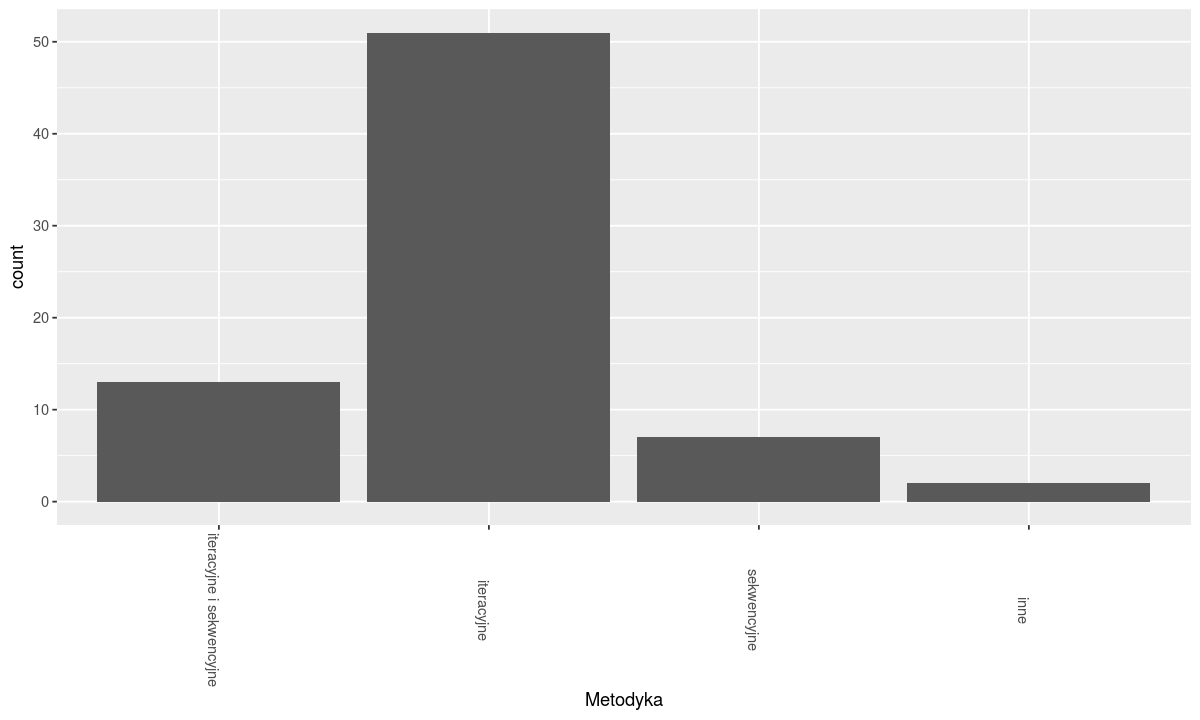

In [35]:
freq_table("Metodyka_norm")
freq_plot("Metodyka_norm")


#TODO nie wiem, czy tak pisac, czy moze na samym poczatku info ze malo osob badanych i nie ma co wielkiej statystyki tu robic? bo tak to trzeba by bylo powtarzac to zdanie przy kazdej zmiennej :/

Jest więc bardzo mało danych przypadającyh na poszczególne grupy odpowiedzi. Tym samym nie jest możliwe przeprowadzenie statystycznie analizy, która sprawdzałaby wpływ rodzaju wybranej metodyki na inne cechy projektu. Jednak w dalszej częsci opracowania przedstawione będą wykresy, które mogą stać się inspiracją do stawiania hipotez i dalszych badań.

### Metodyka a czas trwania projektu

Metodyka,Dl projektu,Liczba_wystapien
iteracyjne i sekwencyjne,"0,5 - 1 roku",2
iteracyjne i sekwencyjne,1-3 lata,5
iteracyjne i sekwencyjne,do pół roku,2
iteracyjne i sekwencyjne,powyżej 3 lat,4
iteracyjne,"0,5 - 1 roku",13
iteracyjne,1-3 lata,18
iteracyjne,do pół roku,9
iteracyjne,powyżej 3 lat,11
sekwencyjne,"0,5 - 1 roku",3
sekwencyjne,1-3 lata,2


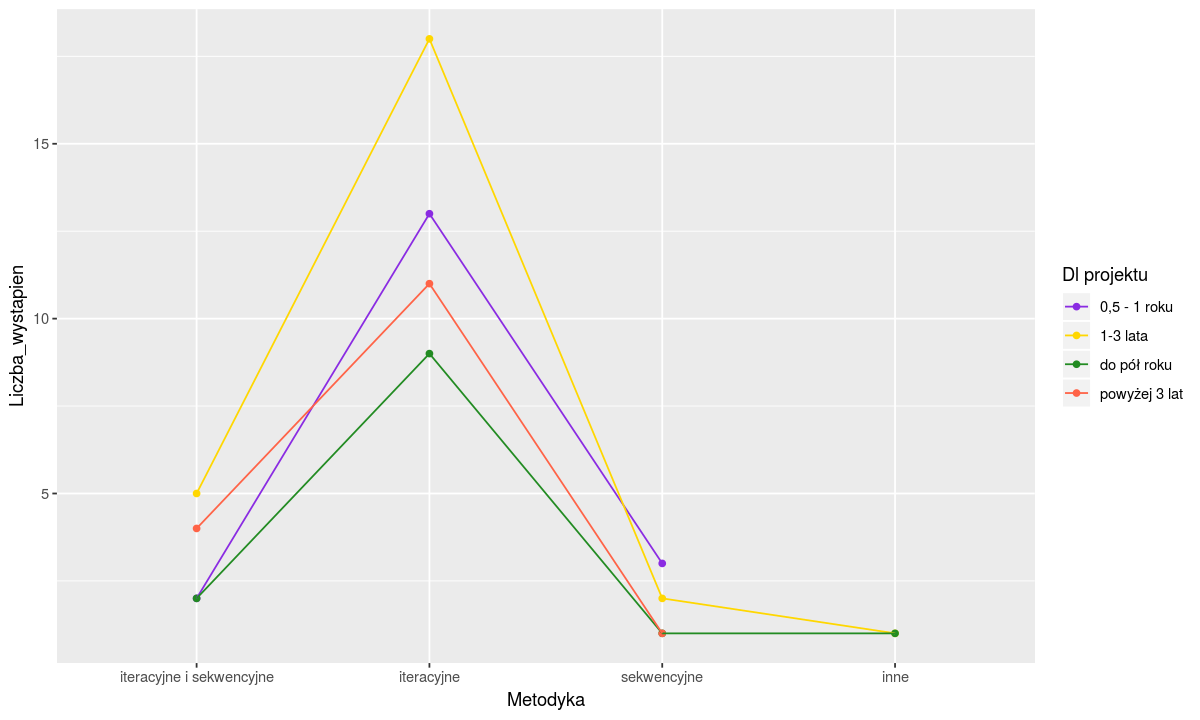

In [28]:
method_length_comb_table <- comb_freq_table("Metodyka_norm", "Dl_projektu")
method_length_comb_table
comb_freq_plot(method_length_comb_table, "Metodyka_norm", "Dl_projektu")

Bez względu na czas trwania projektu podejście iteracyjne jest zawsze najczęściej występującym, a podejście sekwencyjne pojawia się zwykle najrzadziej.

### Czas trwania projektu

Dl projektu,n,Procent,Suma
do pół roku,13,17.80822,17.80822
"0,5 - 1 roku",18,24.65753,42.46575
1-3 lata,26,35.61644,78.08219
powyżej 3 lat,16,21.91781,100.00000


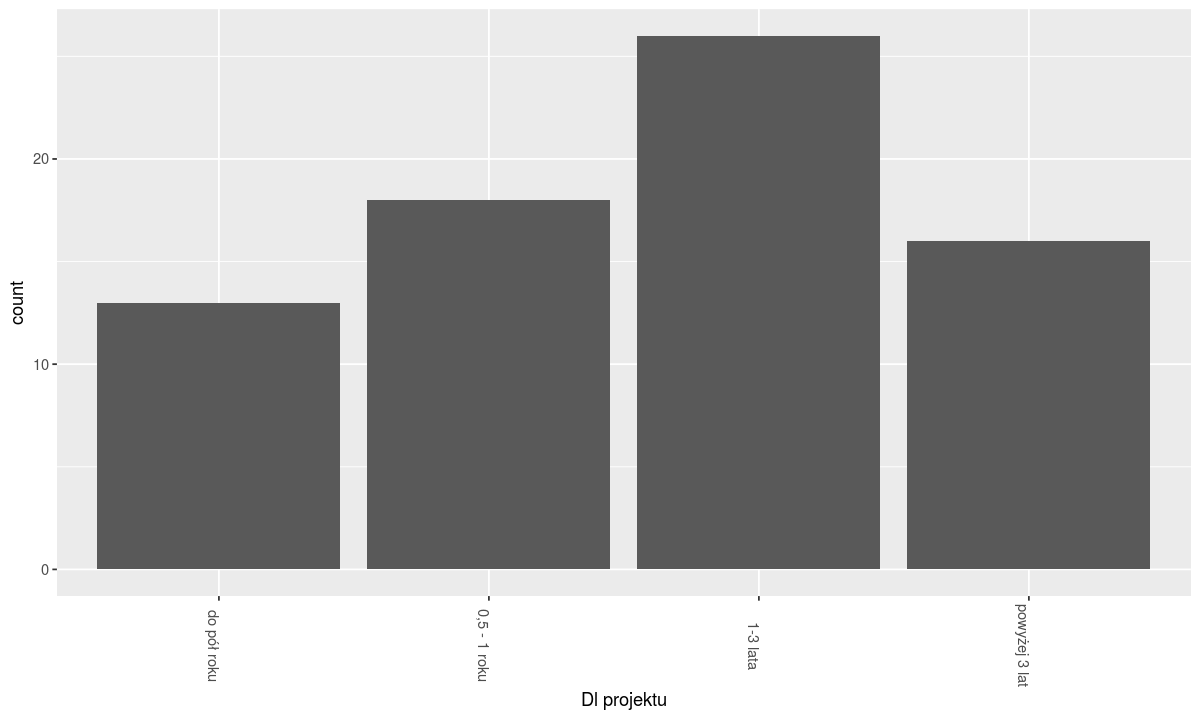

In [29]:
freq_table("Dl_projektu_norm")
freq_plot("Dl_projektu_norm")

Respondenci najczęściej uczestniczyli w projektach trwających 1-3 lat, a w krótkich projektach (trwających do pół roku) uczestniczyli najrzadziej.

### Udział testerów

Udzial testerow,n,Procent,Suma
pełny,9,12.328767,12.32877
recenzja,24,32.876712,45.20548
wgląd przed testami,12,16.438356,61.64384
wgląd w czasie testów,14,19.178082,80.82192
brak dostępu,3,4.109589,84.93151
brak specyfikacji,8,10.958904,95.89041
inne,3,4.109589,100.00000


Udzial_testerow,Udzial_testerow_norm
"I tak i nie - w niektórych projektach miałam user story i jakieś ogólne podstawy jak apka ma działac, a w innych totalne pustki",inne
"nie wiem, dołączyłem do projektu w trakcie",inne
Nie. Bo nie bylo testerow - nie byli potrzebni,inne


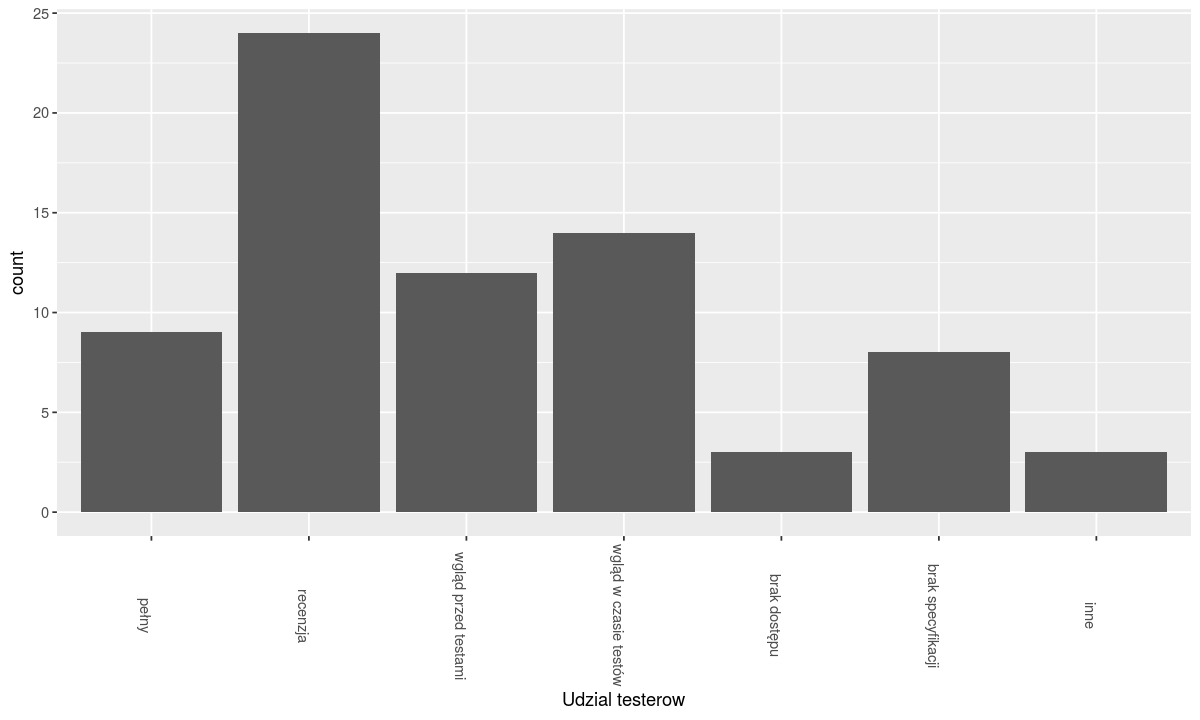

In [30]:
freq_table("Udzial_testerow_norm")
df %>% select(Udzial_testerow, Udzial_testerow_norm) %>% filter(Udzial_testerow_norm=="inne")
freq_plot("Udzial_testerow_norm")

Prawie połowa ankietowanych (około 45%) ma możliwość wnoszenia uwag do specyfikacji jeszcze przed rozpoczęciem prac deweloperskich. Około 1/3 ankietowanych może to robić na etapie recenzji gotowej specyfikacji, a tylko trochę ponad 12% ankietowanych ma możliwość aktywnie uczestniczyć w procesie tworzenia specyfikacji. Ogółem około 60% respondentów miało dostęp do specyfikacji przed rozpoczęciem testów, około 20%  w czasie trwającego procesu, a 15% ankietowanych testerów w ogóle nie miało dostępu do specyfikacji! Pojawiły się też pojedyncze głosy, że to zależy od projektu, albo osoba ankietowana nie miała danych, bo później dołączyła do projektu. Zastanawiająca jest odpowiedź, że testerzy nie brali aktywnego udziału w definiowaniu wymagań, bo "nie bylo testerow - nie byli potrzebni". Przypuszczalnie autorowi tej odpowiedzi chodziło o to, że testerzy nie byli potrzebni w fazie projektowania wymagań, ale na jej podstawie nie można stwierdzić, kiedy testerzy otrzymali gotową specyfikację.

#### Udział testerów a metodyka

Udzial testerow,Metodyka,Liczba_wystapien
pełny,iteracyjne i sekwencyjne,2
pełny,iteracyjne,7
recenzja,iteracyjne i sekwencyjne,3
recenzja,iteracyjne,19
recenzja,sekwencyjne,1
recenzja,inne,1
wgląd przed testami,iteracyjne i sekwencyjne,4
wgląd przed testami,iteracyjne,5
wgląd przed testami,sekwencyjne,3
wgląd w czasie testów,iteracyjne i sekwencyjne,4


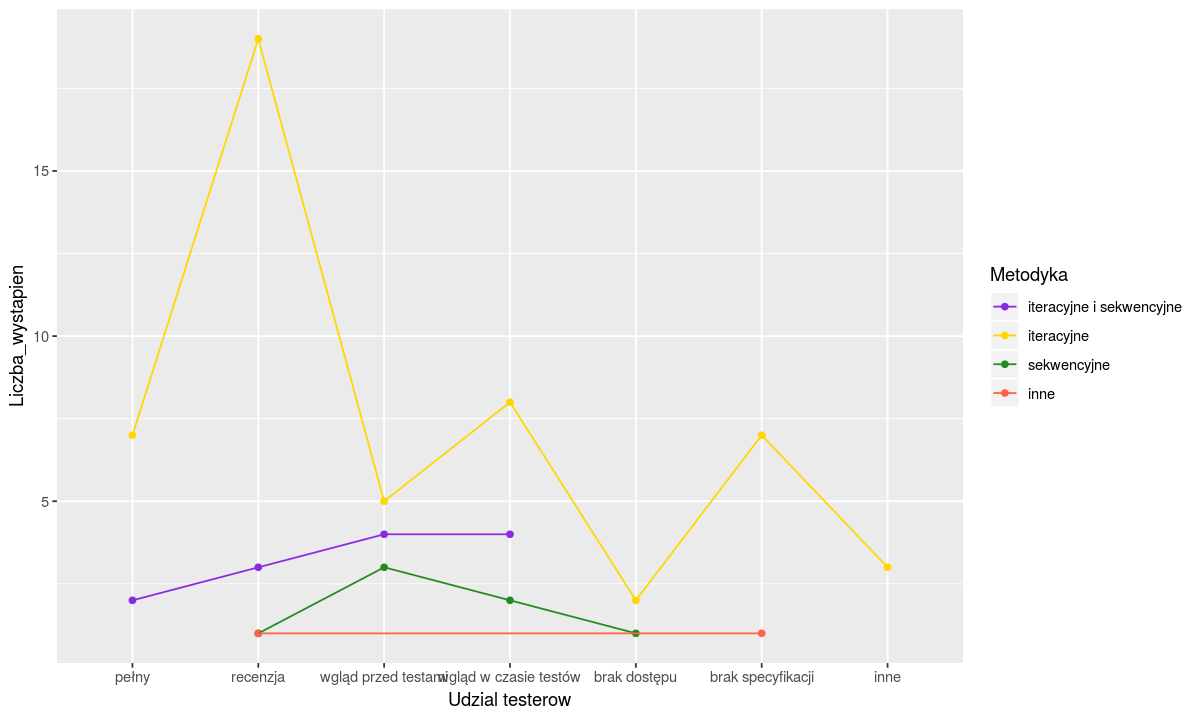

In [31]:
method_length_comb_table <- comb_freq_table("Udzial_testerow_norm", "Metodyka_norm")
method_length_comb_table
comb_freq_plot(method_length_comb_table, "Udzial_testerow_norm", "Metodyka_norm")

W metodykach iteracyjnych ponad 1/3 testerów ma możliwość wnoszenia uwag do gotowej specyfikacji. W metodykach sekwencyjnych testerzy najczęściej mieli wgląd do specyfikacji przed rozpoczęciem testów (choć należy podkreślić, że było tak niewiele danych w tej kategorii odpowiedzi, że wyniki mogą być przypadkowe). Natomiast w żadnej z metodyk nie jest najpowszechniejszą praktyką, aby testerzy brali aktywny udział w definiowaniu wymagań. 

Prawie wszyscy ankietowani, którzy brali udział w definiowaniu wymagań pracowali w metodykach iteracyjnych. W pozostałych dwóch przypadkach ankietowani odpowiedzieli, że pracowali zarówno w metodykach iteracyjncyh, jak i sekwencyjnych. Choć przygotowana ankieta nie daje możliwości weryfikacji tej hipotezy, to prawdopodobnie odpowiedź ta została wybrana właśnie ze względu na doświadczenie w projektach prowadzonych iteracyjnie. Przesłanką uprawdopodabniającą to przypuszczenie jest to, że wśród 7 osób pracujących w metodykach sekwencyjnych, ani jedna osoba nie brała udziału w definiowaniu wymagań. 
Co interesujące, ponad 13% ankietowanych pracujących w metodykach iteracyjnych zgłosiło, że w projekcie brakowało specyfikacji, podczas gdy ani jedna osoba nie zauważyła tego problemu w metodykach sekwencyjnych.

#TODO Są co najmniej dwa możliwe wyjaśnienia...
. Być może ankietowani różnie rozumieją słowo "specyfikacja" i mimo użytego przez autorki ankiety tego terminu w kontekście user story, uważają że jest to za mało. A może na wyrost nazywa  się projekty iteracyjnymi, choć w rzeczywistości są to projekty chaotyczne, nie przemyślane, gdzie faktycznie nie ma spisanej specyfikacji nawet w formie historyjek użytkownika.

#### Udział testerów a czas trwania projektu

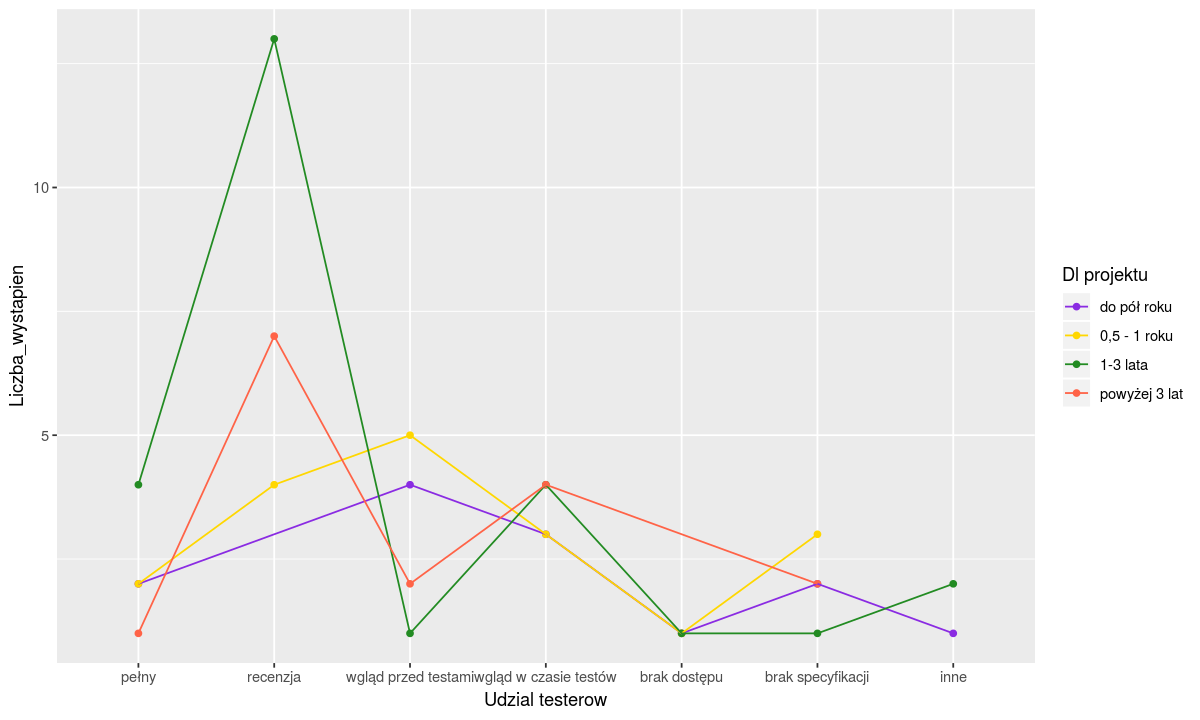

In [32]:
method_length_comb_table <- comb_freq_table("Udzial_testerow_norm", "Dl_projektu_norm")
# method_length_comb_table
comb_freq_plot(method_length_comb_table, "Udzial_testerow_norm", "Dl_projektu_norm")

Tendencja, że testerzy najczęśniej uczestniczą w fazie recenzji wymagań, najbardziej wyraźna jest dla długich projektów (tych trwających 1-3 lata i tych trwających powyżej 3 lat). Natomiast dla projektów krótszych najczęstszą praktyką jest wgląd do specyfikacji przed testami.

#### Udział testerów  a osoba odpowiedzialna

Udzial testerow,Os odpowiedzialna,Liczba_wystapien
pełny,biznes,2
pełny,programista,1
pełny,tester,2
pełny,zespół,2
pełny,inne,2
recenzja,biznes,10
recenzja,programista,1
recenzja,tester,2
recenzja,zespół,4
recenzja,nikt,3


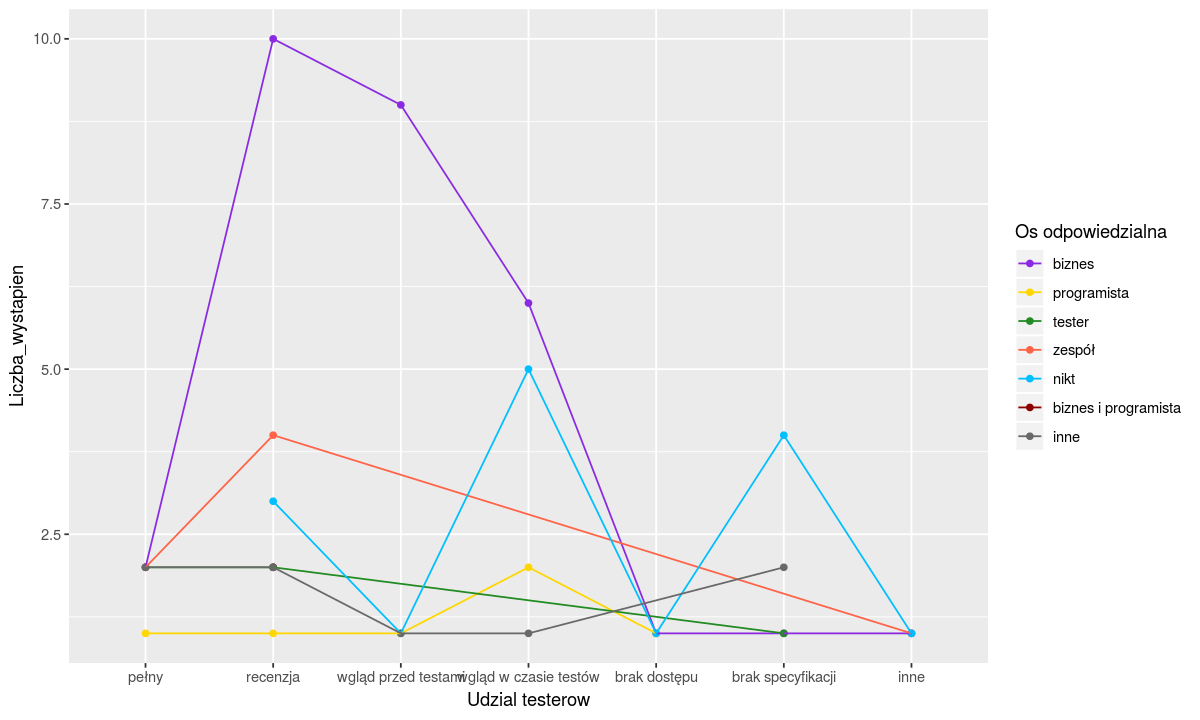

In [33]:
method_length_comb_table <- comb_freq_table("Udzial_testerow_norm", "Os_odpowiedzialna_norm")
method_length_comb_table
comb_freq_plot(method_length_comb_table, "Udzial_testerow_norm", "Os_odpowiedzialna_norm")

#TODO
- cos o ogolnej tendencji?
- gdy tester albo zespol to zazwyczaj udzial pelny lub recenzja (a te skrajne przypadki brak specyfikacji i inne?)
- 


### Spisywanie wymagań

Spisanie wymagan,n,Procent,Suma
na początku,10,13.698630,13.69863
"na początku, ale się zmieniały",26,35.616438,49.31507
w trakcie,21,28.767123,78.08219
częściowo,11,15.068493,93.15068
niespisane,3,4.109589,97.26027
inne,2,2.739726,100.00000


Spisanie_wymagan,Spisanie_wymagan_norm
"praktycznie wszystko powyższe, każdy ticket miał swoją historię.",inne
A kto to wie,inne


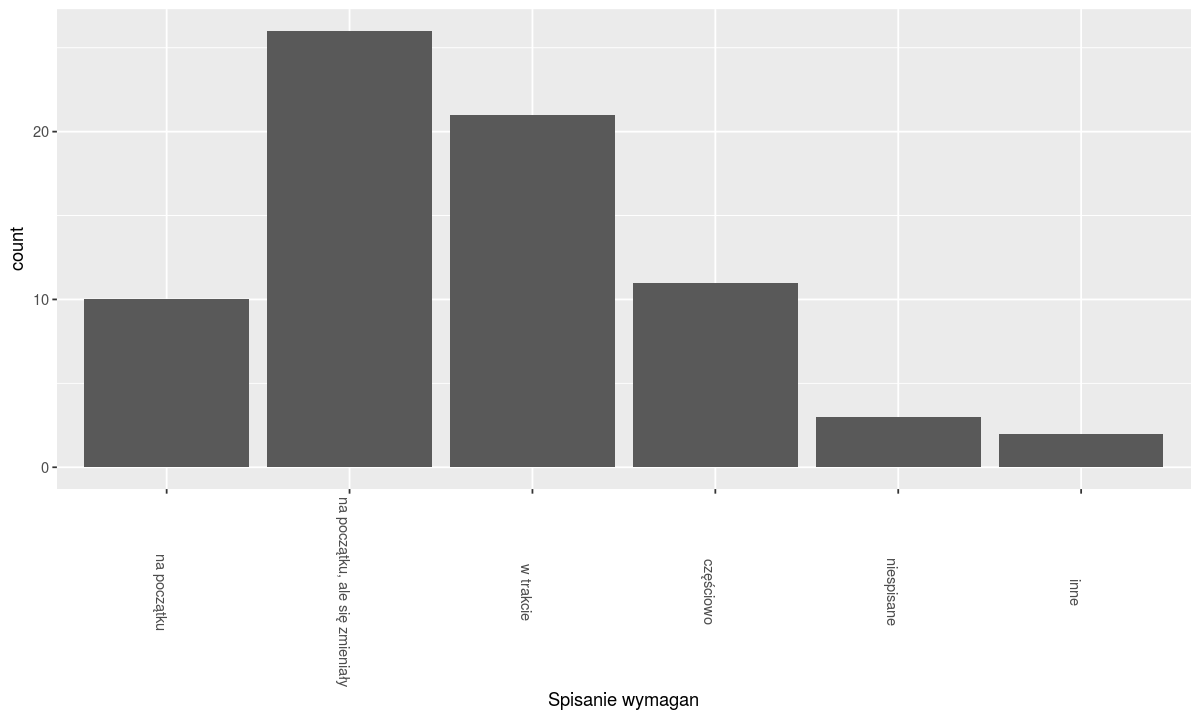

In [34]:
freq_table("Spisanie_wymagan_norm")
df %>% select(Spisanie_wymagan, Spisanie_wymagan_norm) %>% filter(Spisanie_wymagan_norm=="inne")
freq_plot("Spisanie_wymagan_norm")

Najczęściej wymagania były spisywane na początku, jednak w trakcie projektu się zmieniały (ponad 1/3 wszystkich odpowiedzi). W "idealnych" projektach, gdzie wymagania były ustalane na samym początku i się ich trzymano do końca, pracowało prawie 15% ankietowanych testerów. Spora część respondentów pracowała w projektach, gdzie wymagania na bieżąco były spisywane, bo dopiero się klarowały np. w postaci user stories. Te trzy grupy odpowiedzi łącznie dają prawie 80% wszystkich odpowiedzi. W pozostałych przypadkach wymagania były spisane tylko częściowo lub w ogóle.

#TODO
CO z tymi dwoma skrajnymi odp?

#### Spisywanie wymagań a metodyka

Spisanie wymagan,Metodyka,Liczba_wystapien
na początku,iteracyjne,6
na początku,sekwencyjne,4
"na początku, ale się zmieniały",iteracyjne i sekwencyjne,9
"na początku, ale się zmieniały",iteracyjne,14
"na początku, ale się zmieniały",sekwencyjne,2
"na początku, ale się zmieniały",inne,1
w trakcie,iteracyjne i sekwencyjne,2
w trakcie,iteracyjne,18
w trakcie,sekwencyjne,1
częściowo,iteracyjne i sekwencyjne,1


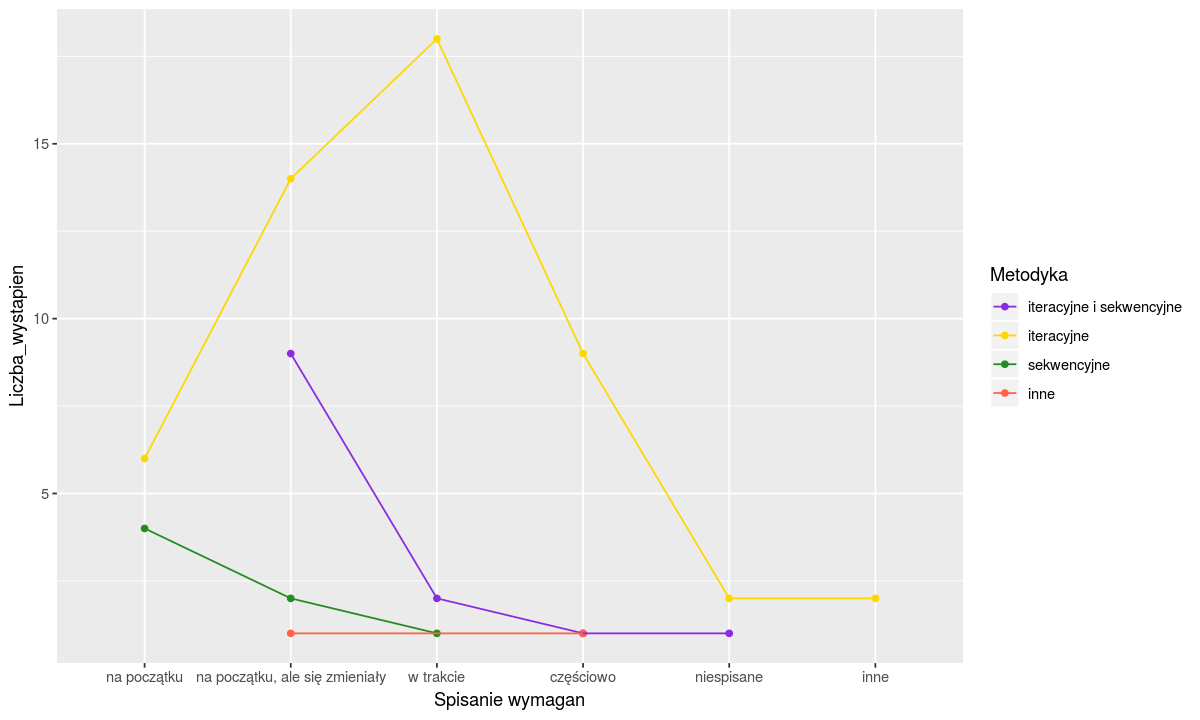

In [35]:
method_length_comb_table <- comb_freq_table("Spisanie_wymagan_norm", "Metodyka_norm")
method_length_comb_table
comb_freq_plot(method_length_comb_table, "Spisanie_wymagan_norm", "Metodyka_norm")

Jak można się było spodziewać w metodykach sekwencyjnych w większości przypadków wymagania spisywane były na samym początku. Wybór metodyki nie uchronił jednak przed zjawiskiem zmiany wymagań w trakcie trwania projektu, bo również i w tej grupie zdarzyły się takie odpowiedzi. Wśród respondentów pracujących w metodykach sekwencyjnych nie zdarzyło się, aby wymagania były spisane częściowo albo wcale. Natomiast w metodykach iteracyjnych jest to dość częstą praktyką.

#### Spisywanie wymagań a czas trwania projektów

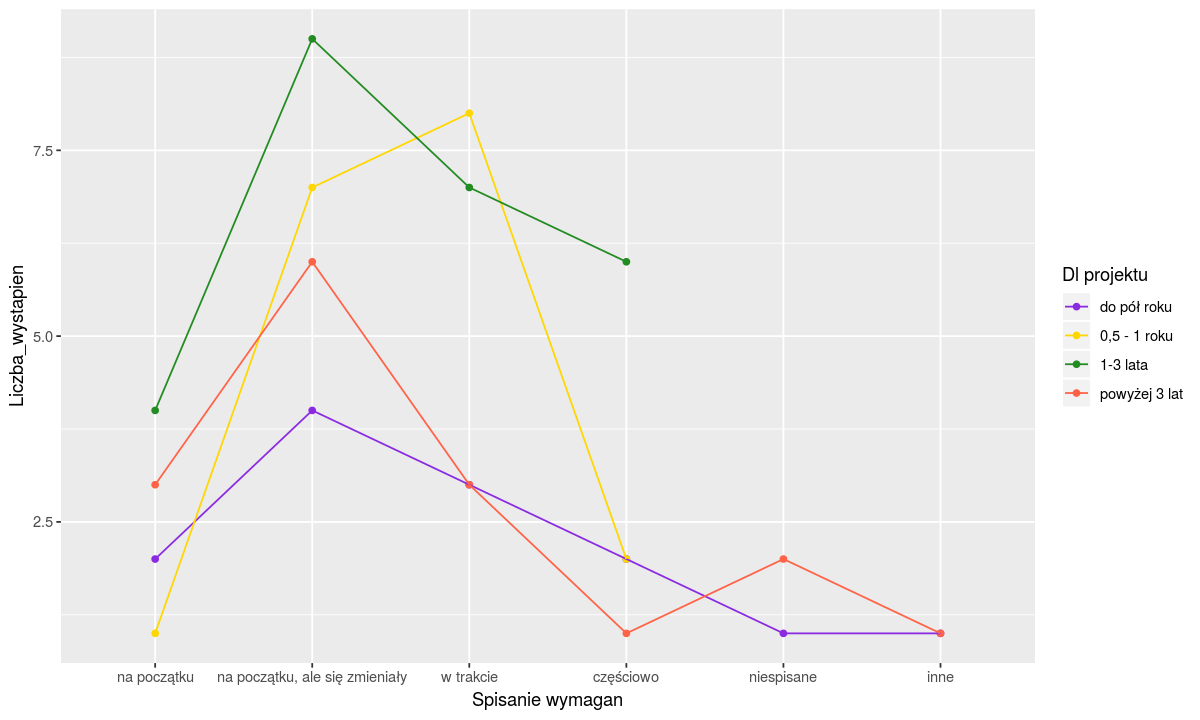

In [36]:
method_length_comb_table <- comb_freq_table("Spisanie_wymagan_norm", "Dl_projektu_norm")
# method_length_comb_table
comb_freq_plot(method_length_comb_table, "Spisanie_wymagan_norm", "Dl_projektu_norm")

Prawie zawsze niezależnie od czasu trwania projektu wymagania najczęściej spisywane były na początku, ale upływ czasu powodował, że ulegały one zmianie.

Pojedyncze przypadki niespisywania wymagań trafiły się w projektach do pół roku i powyżej 3 lat. I o ile w przypadku tej pierwszej grupy projektów to bardzo nie dziwi, o tyle trudno sobie wyobrazić projekt trwający kilka lat, dla którego wszystkie wymagania przekazywane są ustnie i trzymane w głowach zespołu deweloperskiego.

#### Spisywanie wymagań a udział testerów

Spisanie wymagan,Udzial testerow,Liczba_wystapien
na początku,pełny,3
na początku,recenzja,2
na początku,wgląd przed testami,1
na początku,wgląd w czasie testów,2
na początku,brak dostępu,1
na początku,inne,1
"na początku, ale się zmieniały",pełny,2
"na początku, ale się zmieniały",recenzja,9
"na początku, ale się zmieniały",wgląd przed testami,5
"na początku, ale się zmieniały",wgląd w czasie testów,6


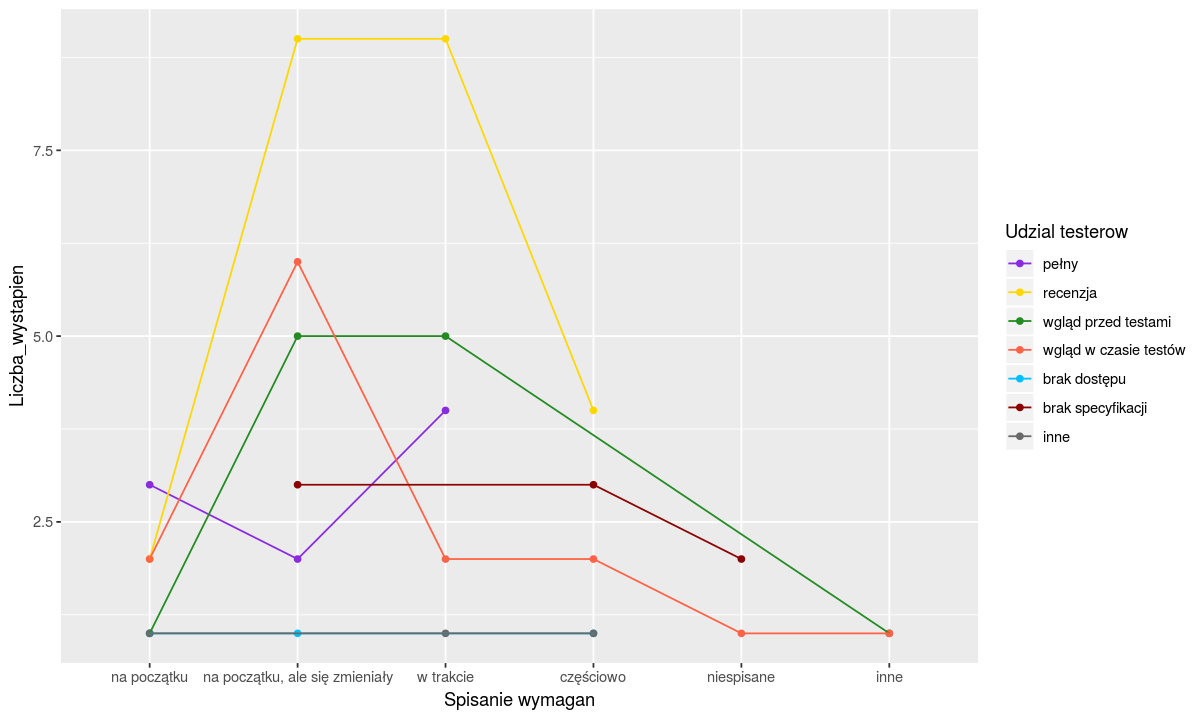

In [37]:
method_length_comb_table <- comb_freq_table("Spisanie_wymagan_norm", "Udzial_testerow_norm")
method_length_comb_table
comb_freq_plot(method_length_comb_table, "Spisanie_wymagan_norm", "Udzial_testerow_norm")

W projektach, gdzie testerzy w pełni od początku uczestniczyli w tworzeniu wymagań, nie zdarzało się, żeby wymagania były spisywane częściowo!

#### Spisywanie wymagań a osoba odpowiedzialna

Spisanie wymagan,Os odpowiedzialna,Liczba_wystapien
na początku,biznes,6
na początku,programista,1
na początku,tester,1
na początku,biznes i programista,1
na początku,inne,1
"na początku, ale się zmieniały",biznes,11
"na początku, ale się zmieniały",programista,2
"na początku, ale się zmieniały",tester,1
"na początku, ale się zmieniały",zespół,2
"na początku, ale się zmieniały",nikt,5


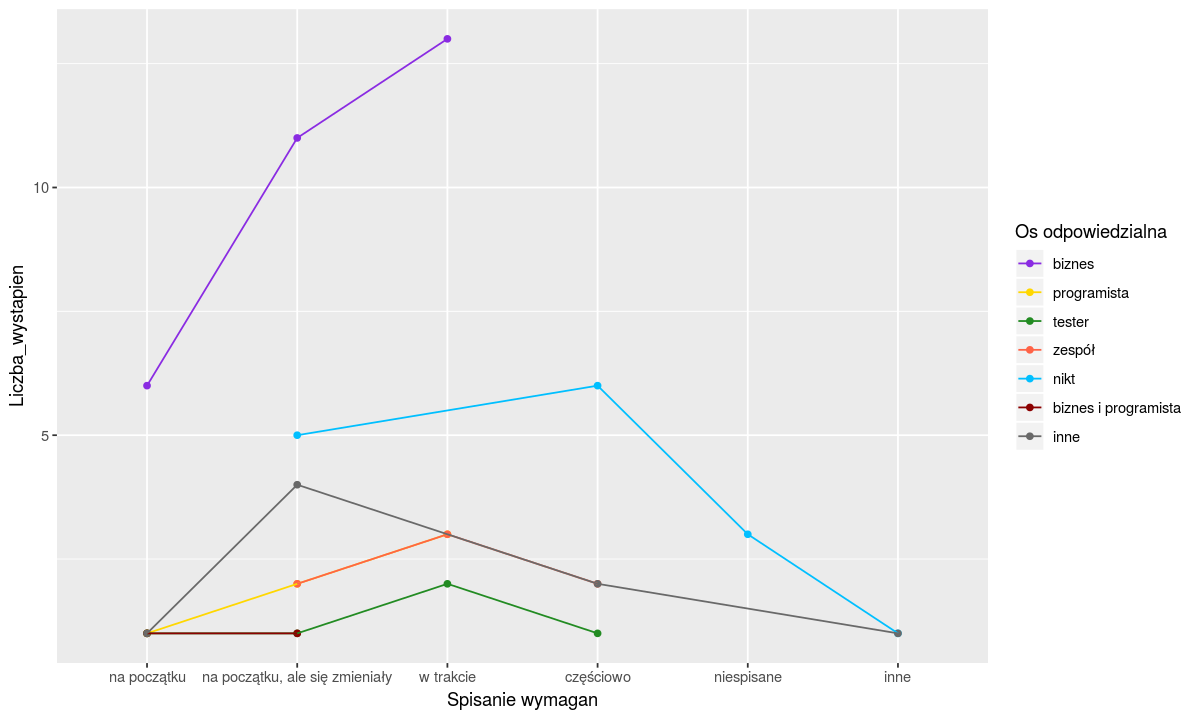

In [38]:
method_length_comb_table <- comb_freq_table("Spisanie_wymagan_norm", "Os_odpowiedzialna_norm")
method_length_comb_table
comb_freq_plot(method_length_comb_table, "Spisanie_wymagan_norm", "Os_odpowiedzialna_norm")

Na podstawie wyników ankiety można postawić hipotezę, że największe ryzyko, że wymagania będą spisywane tylko częściowo, pojawia się wtedy, gdy nie ma w zespole osoby odpowiedzialnej za aktualizowanie specyfikacji.

In [39]:
# BRULION

df %>% select(Spisanie_wymagan, Spisanie_wymagan_norm) %>% filter(Spisanie_wymagan_norm=="inne")

df %>% select(Os_odpowiedzialna, Os_odpowiedzialna_norm) %>% filter(Os_odpowiedzialna_norm=="inne")

# by_x <- group_by(df, Udzial_testerow, Udzial_testerow_norm)
# arrange(summarise(by_x, n = n()), Udzial_testerow_norm)

Spisanie_wymagan,Spisanie_wymagan_norm
"praktycznie wszystko powyższe, każdy ticket miał swoją historię.",inne
A kto to wie,inne


Os_odpowiedzialna,Os_odpowiedzialna_norm
Wstępną specyfikację wykonał klient,inne
"brak specyfikacji, ustne ustalenia i próby zebrania wymagan przez zespol testerski na etapie testów",inne
"W zależności od projektu, był to raz PO, raz analityk, tester, scram master",inne
"Oficjalnie odpowiedzialna była PO we współpracy z klientem, w praktyce większość robiła SM, pozostała część to przepisywane przez zespół ustalenia wpadające przez inne kanały (slack, mail, telefon) - robione głównie ze względu na mnie.",inne
Albk robilismy to jako zespol albo mielismy BA,inne
"Tak, raz analitycy biznesowi, czasami ktoś z zespołu deweloperskiego (testerze lub programiści)",inne
Product owner lub developer pracujacy nad historią,inne
nie było specyfikacji jako takiej,inne


### Osoba odpowiedzialna za utrzymanie aktualnej specyfikacji

Os odpowiedzialna,n,Procent,Suma
biznes,30,41.095890,41.09589
programista,6,8.219178,49.31507
tester,5,6.849315,56.16438
zespół,7,9.589041,65.75342
nikt,15,20.547945,86.30137
biznes i programista,2,2.739726,89.04110
inne,8,10.958904,100.00000


Os_odpowiedzialna_norm,Os_odpowiedzialna
inne,Wstępną specyfikację wykonał klient
inne,"brak specyfikacji, ustne ustalenia i próby zebrania wymagan przez zespol testerski na etapie testów"
inne,"W zależności od projektu, był to raz PO, raz analityk, tester, scram master"
inne,"Oficjalnie odpowiedzialna była PO we współpracy z klientem, w praktyce większość robiła SM, pozostała część to przepisywane przez zespół ustalenia wpadające przez inne kanały (slack, mail, telefon) - robione głównie ze względu na mnie."
inne,Albk robilismy to jako zespol albo mielismy BA
inne,"Tak, raz analitycy biznesowi, czasami ktoś z zespołu deweloperskiego (testerze lub programiści)"
inne,Product owner lub developer pracujacy nad historią
inne,nie było specyfikacji jako takiej


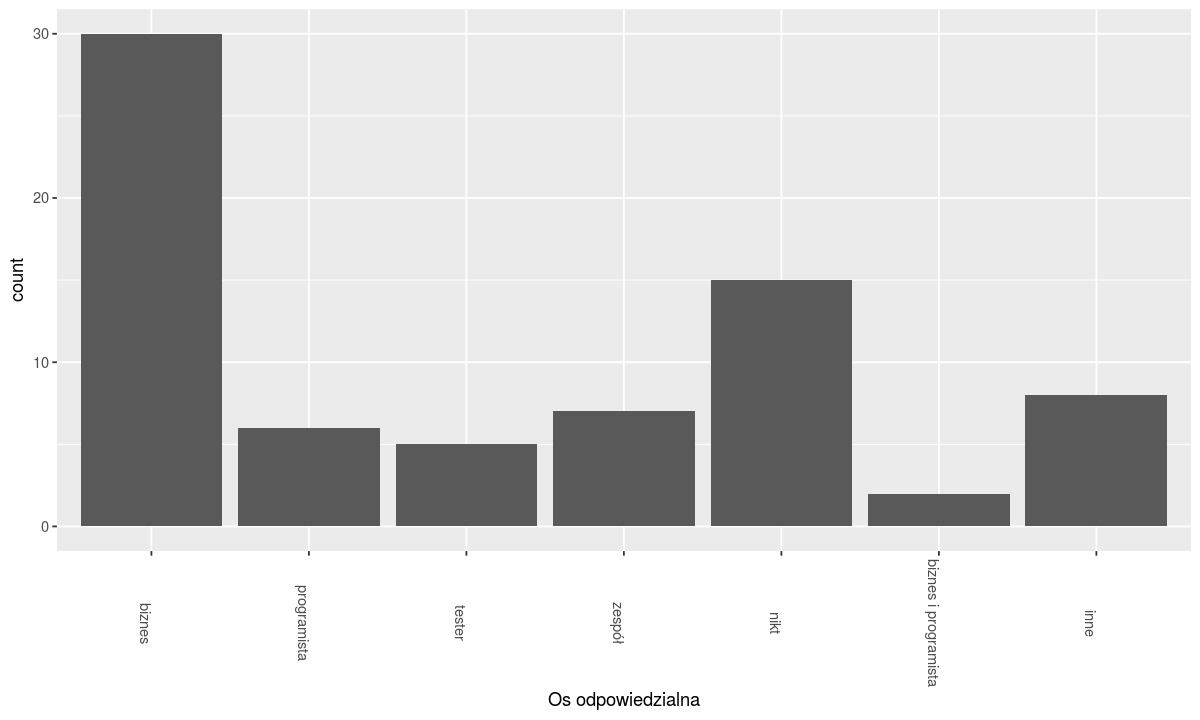

In [40]:
freq_table("Os_odpowiedzialna_norm")
freq_plot("Os_odpowiedzialna_norm")
filter(df, Os_odpowiedzialna_norm=='inne') %>% select(Os_odpowiedzialna_norm, Os_odpowiedzialna)

Najczęściej osoba z biznesu była odpowiedzialna za aktualizację specyfikacji (ponad 40% wszystkich odpowiedzi). Niepokojąca jest zaś druga co do częstości odpowiedź - w ponad 20% przypadków nie było osoby w zespole, która byłaby odpowiedzialna. Testerzy stosunkowo rzadko odpowiedzialni byli za aktualizację specyfikacji (niecałe 7% przypadków). Częściej zdarzało się, że odpowiedzialność spoczywała na całym zespole (prawie 10% odpowiedzi). 

Wśród innych odpowiedzi (łącznie nieco ponad 10%) znalazły się głosy, że to zależy od projektu albo wcale nie było spisanej specyfikacji.

#### Osoba odpowiedzialna a metodyka

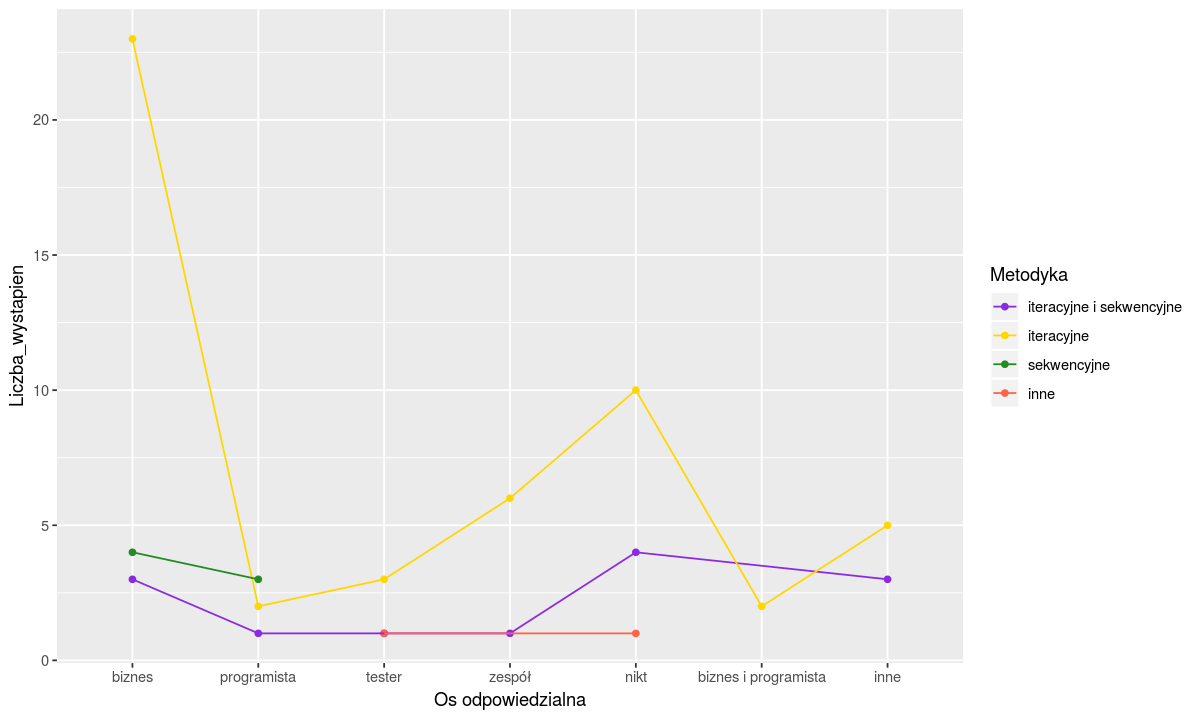

In [41]:
method_length_comb_table <- comb_freq_table("Os_odpowiedzialna_norm", "Metodyka_norm")
# method_length_comb_table
comb_freq_plot(method_length_comb_table, "Os_odpowiedzialna_norm", "Metodyka_norm")

W projektach sekwencyjnych albo osoba z biznesu była odpowiedzialna, albo programista. Nie zdarzały się sytuacje, aby nie było wyznaczonej osoby odpowiedzialnej za aktualizację specyfikacji! Natomiast w projektach prowadzonych iteracyjnie pojawiały się wszystkie typy odpowiedzi. Najczęściej była to osoba z biznesu. Drugą co do częstości odpowiedzią było, że nikt nie był odpowiedzialny za aktualizację. Trzecią, co do częstości odpowiedzi, było to, że na całym zespole spoczywała odpowiedzialność.

#### Osoba odpowiedzialna a czas trwania projektu

Os odpowiedzialna,Dl projektu,Liczba_wystapien
biznes,do pół roku,6
biznes,"0,5 - 1 roku",8
biznes,1-3 lata,8
biznes,powyżej 3 lat,8
programista,do pół roku,1
programista,"0,5 - 1 roku",3
programista,1-3 lata,2
tester,do pół roku,1
tester,"0,5 - 1 roku",2
tester,1-3 lata,2


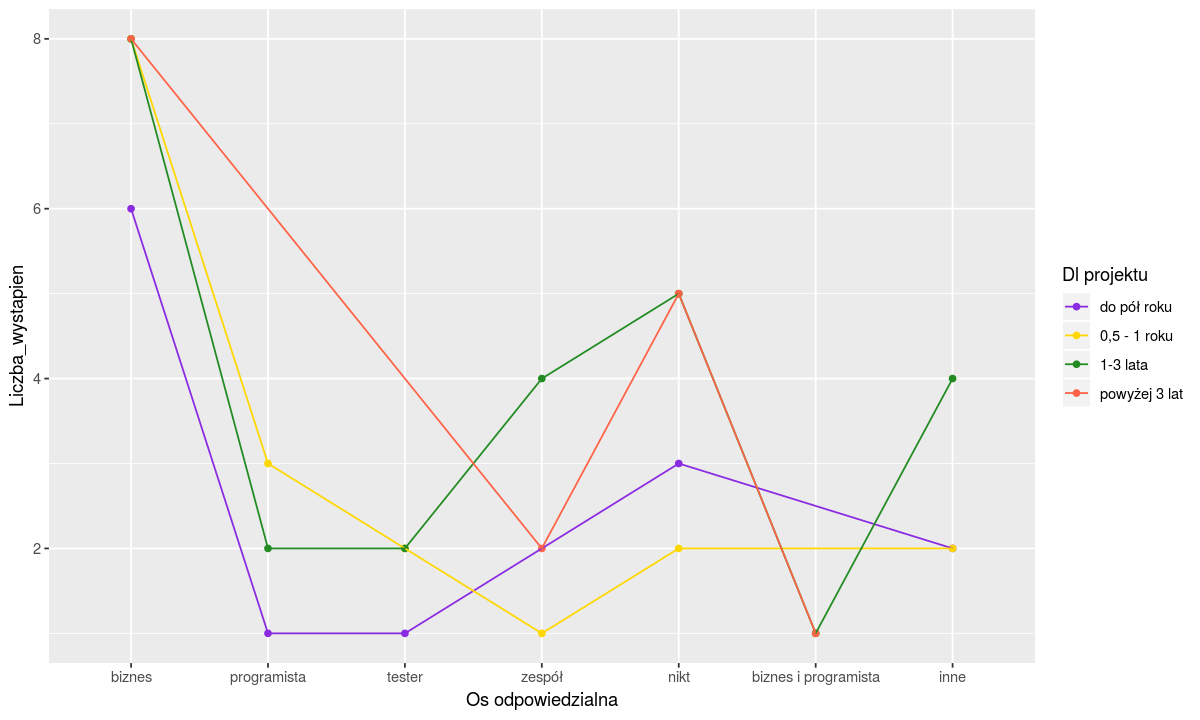

In [42]:
method_length_comb_table <- comb_freq_table("Os_odpowiedzialna_norm", "Dl_projektu_norm")
method_length_comb_table
comb_freq_plot(method_length_comb_table, "Os_odpowiedzialna_norm", "Dl_projektu_norm")

Niezależnie od czasu trwania projektu, zawsze najczęstszą odpowiedzią było, że osoba z biznesu jest odpowiedzialna za aktualizację specyfikacji. Niepokojące, że dla projektów dłuższych (trwających powyżej 1 roku) drugą, co do częstości, odpowiedzią było, że nie było osoby odpowiedzialnej za aktualizację specyfikacji.

### Długość specyfikacji

L stron,n,Procent,Suma
do pół strony,5,6.849315,6.849315
do 1 strony,7,9.589041,16.438356
do 10 stron,9,12.328767,28.767123
powyżej 10 stron,34,46.575342,75.342466
trudno ocenić (np. jira),8,10.958904,86.301370
brak dostępu,1,1.369863,87.671233
brak specyfikacji,7,9.589041,97.260274
inne,2,2.739726,100.000000


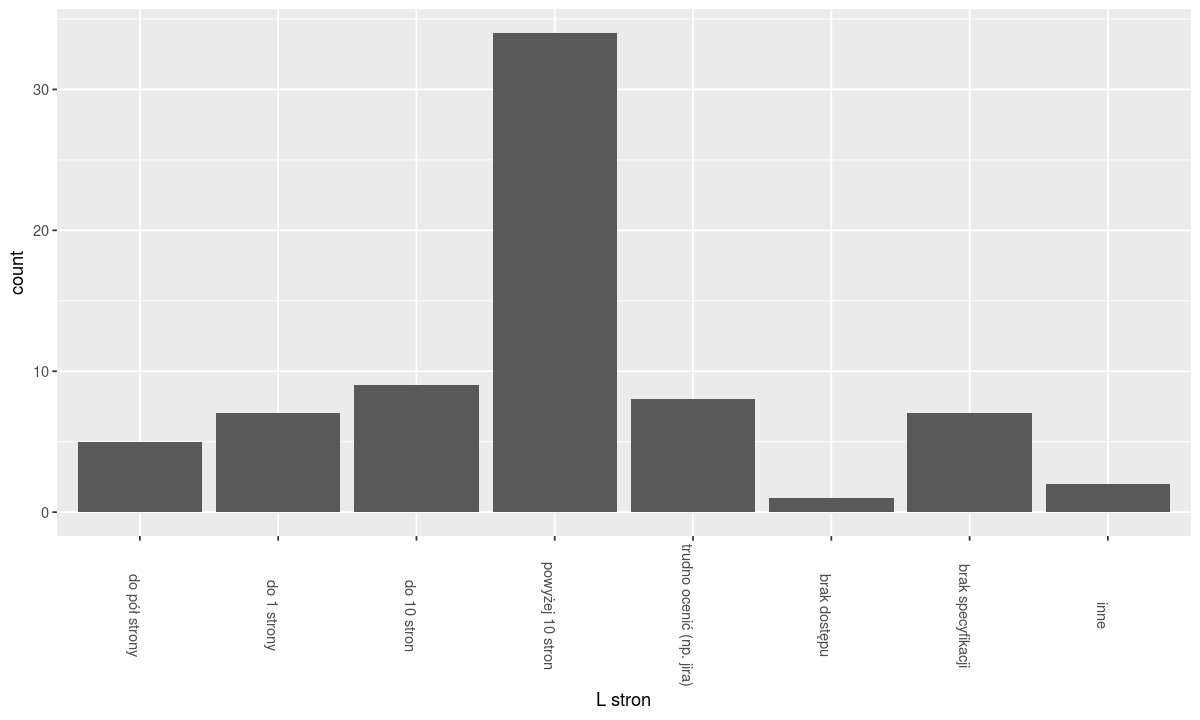

In [43]:
freq_table("L_stron_norm")
freq_plot("L_stron_norm")

In [44]:
select(df, L_stron_norm, L_stron) %>% filter(L_stron_norm == "inne")

L_stron_norm,L_stron
inne,Prs
inne,róznie


Prawie połowa ankietowanych odpowiedziała, że specyfikacja w ich projektach zwykle liczyła powyżej 10 stron. Ponad 12% ankietowanych, że do 10 stron, prawie 10% ankietowanych, że do 1 strony, a niecałe 7% - do pół strony. Co dziesiątej osobie trudno było wyrazić długość specyfikacji, podając liczbę stron, gdyż była ona rozpisana w formie zadań/user stories w systemach typu Jira. Prawie 11% ankietowanych zaznaczyło, że nie było dostępu do specyfikacji, albo jej nie było. Jedna osoba zaznaczyła, że to zależy od projektu. Natomiast pozostała odpowiedź "Prs" jest niejasna.

#### Długość specyfikacji a metodyka

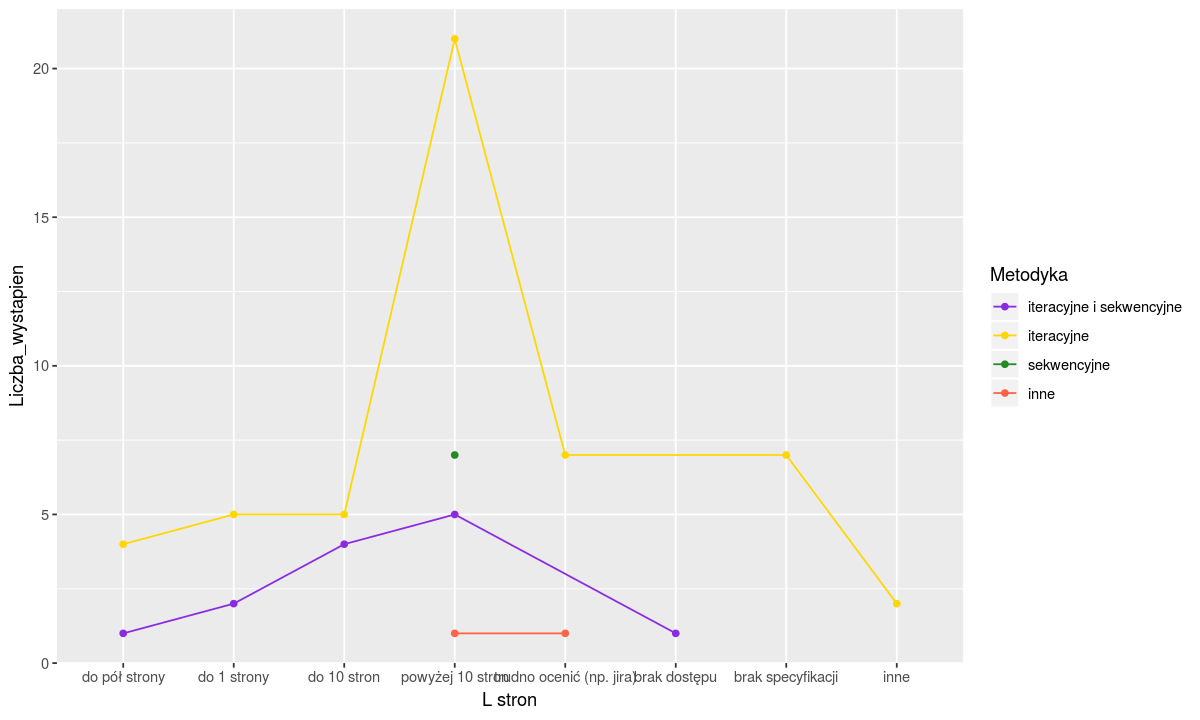

In [45]:
method_length_comb_table <- comb_freq_table("L_stron_norm", "Metodyka_norm")
# method_length_comb_table
comb_freq_plot(method_length_comb_table, "L_stron_norm", "Metodyka_norm")

Główną zauważalną różnicą między projektami prowadzonymi sekwencyjnie i iteracyjnie jest to, że specyfikacja w tych pierwszych metodykach jest zawsze długa (powyżej 10 stron), natomiast w metodykach iteracyjnych różnie z tym jest. Należy przypomnieć, że różnica nie tkwi w długości trwania projektów, bo wśród projektów prowadzonych sekwencyjnie znajdowały się zarówno projekty długie jak i krótkie.
Dla projektów prowadzonych iteracyjnie utrzymuje się zależność, że specyfikacja najczęściej ma powyżej 10 stron.

#### Długość specyfikacji a czas trwania projektu

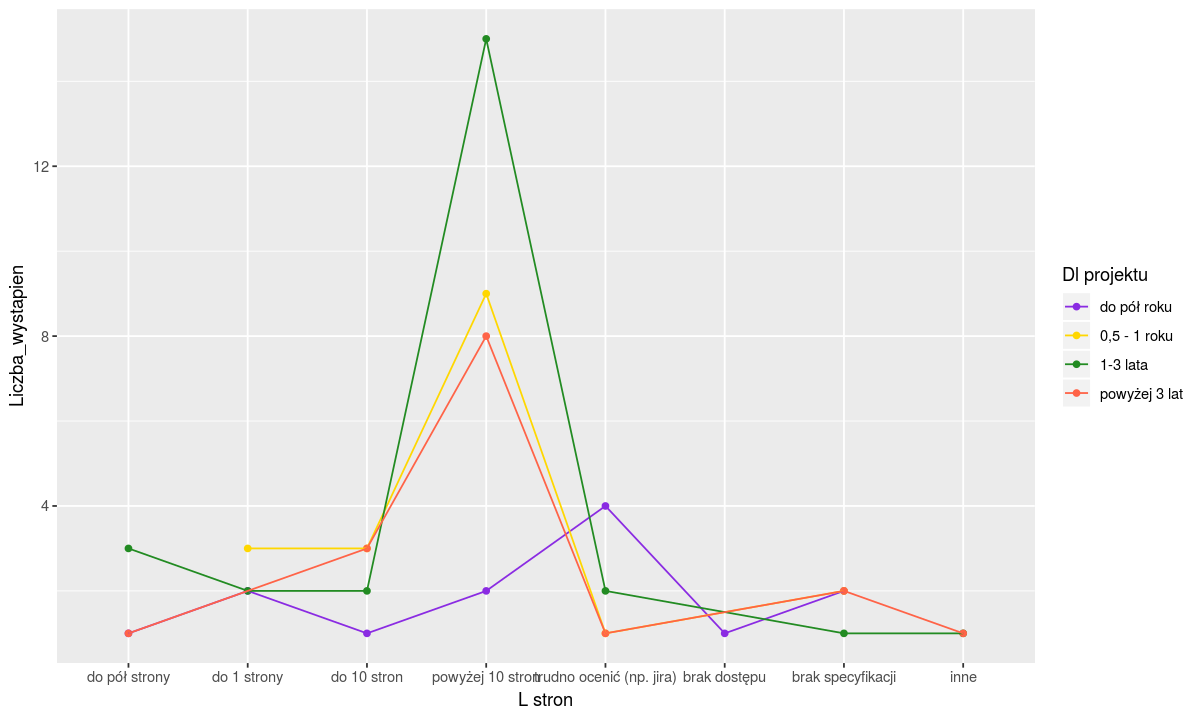

In [46]:
method_length_comb_table <- comb_freq_table("L_stron_norm", "Dl_projektu_norm")
# method_length_comb_table
comb_freq_plot(method_length_comb_table, "L_stron_norm", "Dl_projektu_norm")

Zwykle niezależnie od czasu trwania projektu najczęściej specyfikacja liczyła więcej niż 10 stron. Wyjątkiem stanowią projekty najkrótsze, trwające do pół roku, dla których ankietowanym trudno było określić liczbę stron. Przyglądając się rozkładowi głosów tylko i wyłącznie dla tej odpowiedzi, można zauważyć, że najwięcej przypadków wyborów tej odpowiedzi miało miejsce w przypadku projektów trwających do pół roku. Można postawić hipotezę, że w przypadku projektów bardzo krótkich nie opłaca się tworzyć osobnych dokumentów ze specyfikacją, i że sprawniej jest korzystać wyłącznie z narzędzi do zarządzania zadaniami.

#### Długość specyfikacji a udział testerów

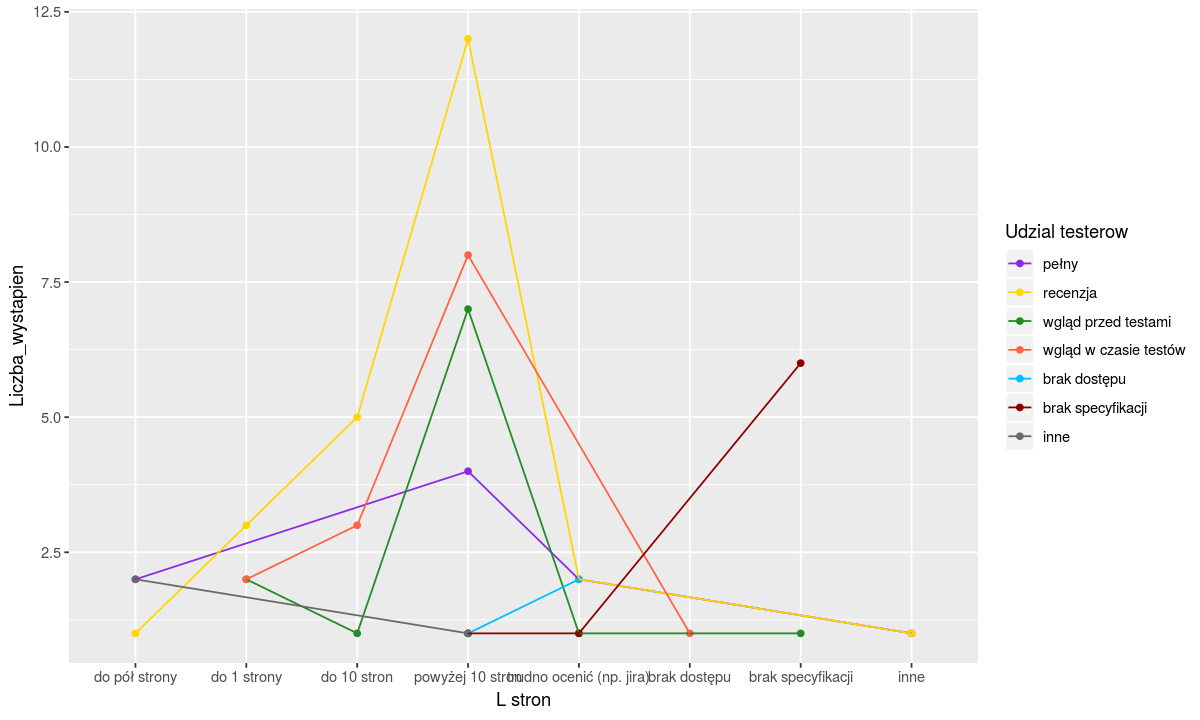

In [47]:
method_length_comb_table <- comb_freq_table("L_stron_norm", "Udzial_testerow_norm")
# method_length_comb_table
comb_freq_plot(method_length_comb_table, "L_stron_norm", "Udzial_testerow_norm")

Bez względu na etap, w którym testerzy zapoznają się/współtworzą specyfikację, zwykle specyfikacja ma powyżej 10 stron.

W odpowiedziach można zauważyć pewną nieścisłość. Tam gdzie nie było specyfikacji lub była ona niedostępna spodziewać się można było odpowiedzi "brak specyfikacji" lub innej. Natomiast jest kilka odpowiedzi, gdzie mimo zadeklarowanego braku lub brak dostępu do specyfikacji ankietowani wybrali inne odpowiedzi.

#### Długość specyfikacji a spisywanie wymagań

L stron,Spisanie wymagan,Liczba_wystapien
do pół strony,"na początku, ale się zmieniały",1
do pół strony,w trakcie,2
do pół strony,częściowo,2
do 1 strony,"na początku, ale się zmieniały",3
do 1 strony,w trakcie,3
do 1 strony,częściowo,1
do 10 stron,"na początku, ale się zmieniały",5
do 10 stron,w trakcie,2
do 10 stron,częściowo,2
powyżej 10 stron,na początku,8


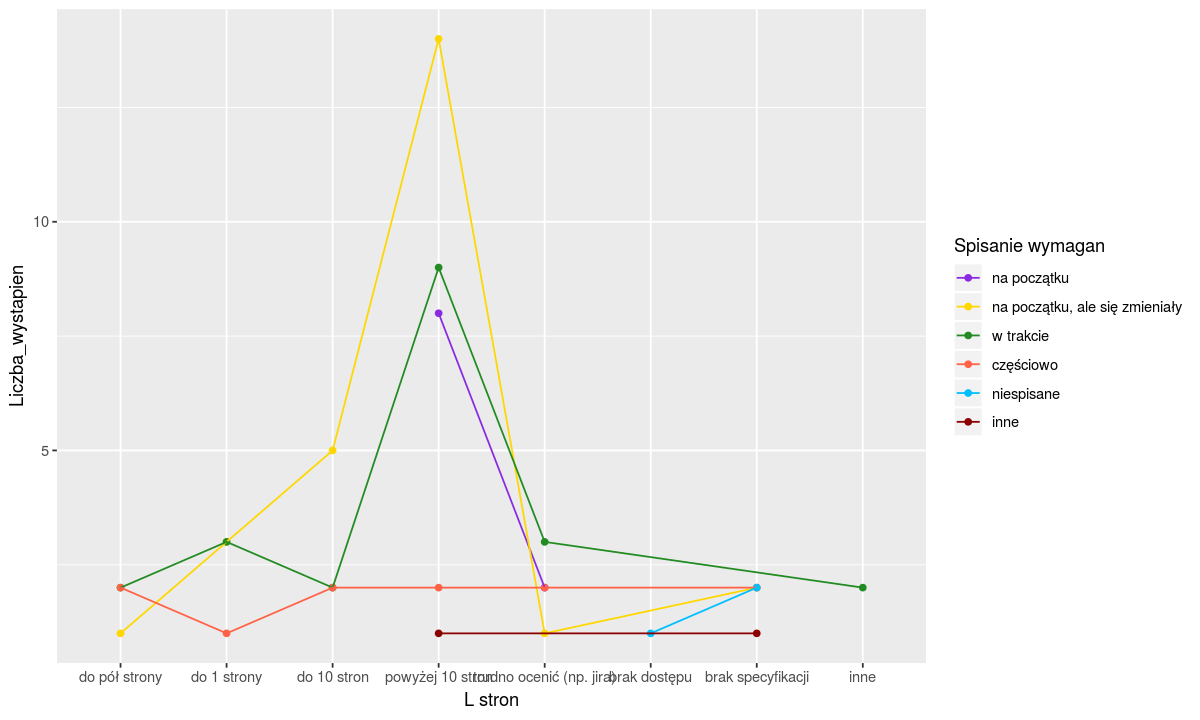

In [48]:
method_length_comb_table <- comb_freq_table("L_stron_norm", "Spisanie_wymagan_norm")
method_length_comb_table
comb_freq_plot(method_length_comb_table, "L_stron_norm", "Spisanie_wymagan_norm")

Zwykle niezależnie od czasu, kiedy specyfikacja była spisywana, dokument liczył powyżej 10 stron. Wyjątek stanowią projekty, gdzie wymagania były spisywane częściowo - w tych przypadkach równie często zdarzały się krótkie specyfikacje co długie.

Co ciekawe, prawie we wszystkich projektach, w których specyfikacja była spisywana na samym początku, specyfikacja liczyła ponad 10 stron. W pozostałych przypadkach ankietowanym trudno było określić długość specyfikacaji, gdyż była rozpisana w formie zadań/user stories.

#### Długość specyfikacji a osoba odpowiedzialna

L stron,Os odpowiedzialna,Liczba_wystapien
do pół strony,zespół,4
do pół strony,nikt,1
do 1 strony,biznes,3
do 1 strony,programista,1
do 1 strony,tester,1
do 1 strony,nikt,1
do 1 strony,inne,1
do 10 stron,biznes,3
do 10 stron,tester,1
do 10 stron,zespół,1


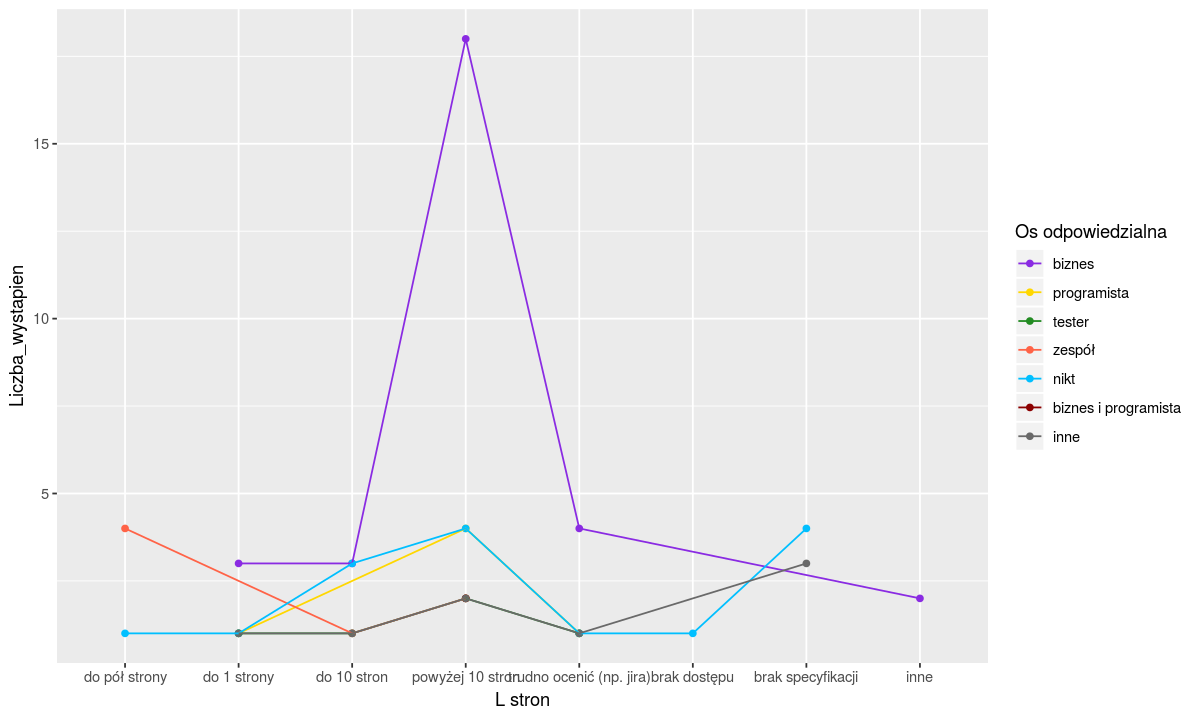

In [49]:
method_length_comb_table <- comb_freq_table("L_stron_norm", "Os_odpowiedzialna_norm")
method_length_comb_table
comb_freq_plot(method_length_comb_table, "L_stron_norm", "Os_odpowiedzialna_norm")

#TODO Zrobić jakąś dodatkowa tabele / rownanie zeby pokazac te polowe biznesu????

W przypadku długich specyfikacji (powyżej 10 stron) w ponad połowie przypadków to osoba z biznesu odpowiedzialna była za aktualizację specyfikacji.
Interesujące, że zespół odpowiedzialny  był za specyfikację najczęściej wtedy, gdy była ona krótka (do pół strony).

### Ważność specyfikacji

Waznosc spec,n,Procent,Suma
niezbędna,33,45.205479,45.20548
"potrzebna, ale nieaktualna",20,27.397260,72.60274
"problematyczna, bo złej jakości",7,9.589041,82.19178
brak specyfikacji,7,9.589041,91.78082
inne,6,8.219178,100.00000


Waznosc_spec_norm,Waznosc_spec
inne,"wg mnie gdyby specyfikacja zostala utworzona wczesniej to szybciej zaprojektowane bylyby przypadki testowe, a caly proces testow bylby mniej chaotyczny i narazony na puszczenie buga"
inne,"Brakuje mi odpowiedzi tak, wiedzielismy co mamy robic mimo ze caly czas sie to zmienialo"
inne,"Pracowaliśmy na podstawie Acceptance Criteria dodawanych w TFSie. Bardzo trudno to przełożyć na kartki A4. I nie do końca rozumiem czego dotyczy pytanie - całego projektu, jednego itemu w projekcie?"
inne,"klient wewnętrzny, wszystko ustalane raczej bez specyfikacji, ewentualnie jakieś małe spisanie wymagań. Wiadomo, że w jakimś stopniu to pomaga."
inne,Często jej formalna część powstawała jako efekt wtórny prac nad oprogramowaniem
inne,"Wymagania zmieniały się w trakcie projektu. Były spisane ogolne wymagania w jirze, a dokladniejsza dokumentacja powstawała w trakcie i po testach"


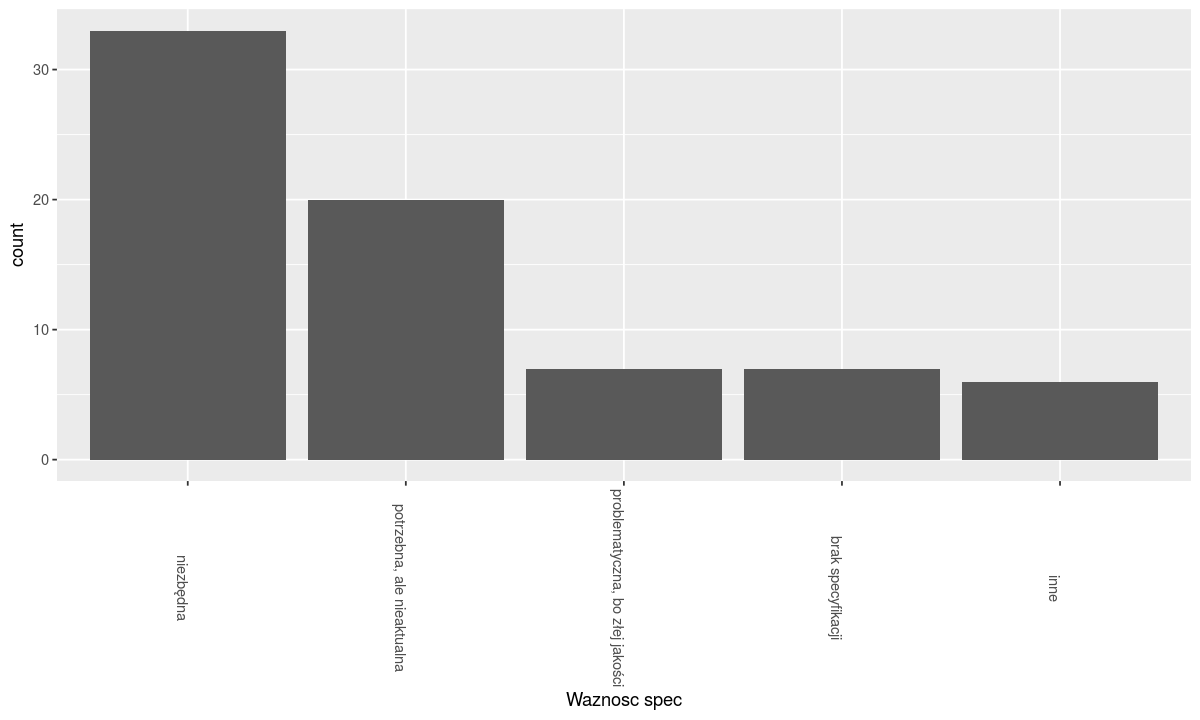

In [50]:
freq_table("Waznosc_spec_norm")
freq_plot("Waznosc_spec_norm")
df %>% select(Waznosc_spec_norm, Waznosc_spec) %>% filter(Waznosc_spec_norm=="inne")

Zaledwie niecała połowa ankietowanych uznała specyfikację za dokument, który miał pozytywny wpływ na zakończenie projektu. Prawie 30% ankietowanym skarżyło się na brak aktualności specyfikacji, przez co dokument był przydatny tylko na początku projektu. Natomiast prawie co dziesiąta osoba deklarowała, że specyfikacja była tak złej jakości, że wiele czasu musiało być poświęconego na dodatkowe wyjaśnienia.

#TODO co z innymi?

#### Ważność specyfikacji a metodyka

Waznosc spec,Metodyka,Liczba_wystapien
niezbędna,iteracyjne i sekwencyjne,7
niezbędna,iteracyjne,20
niezbędna,sekwencyjne,5
niezbędna,inne,1
"potrzebna, ale nieaktualna",iteracyjne i sekwencyjne,3
"potrzebna, ale nieaktualna",iteracyjne,15
"potrzebna, ale nieaktualna",sekwencyjne,2
"problematyczna, bo złej jakości",iteracyjne i sekwencyjne,1
"problematyczna, bo złej jakości",iteracyjne,6
brak specyfikacji,iteracyjne i sekwencyjne,1


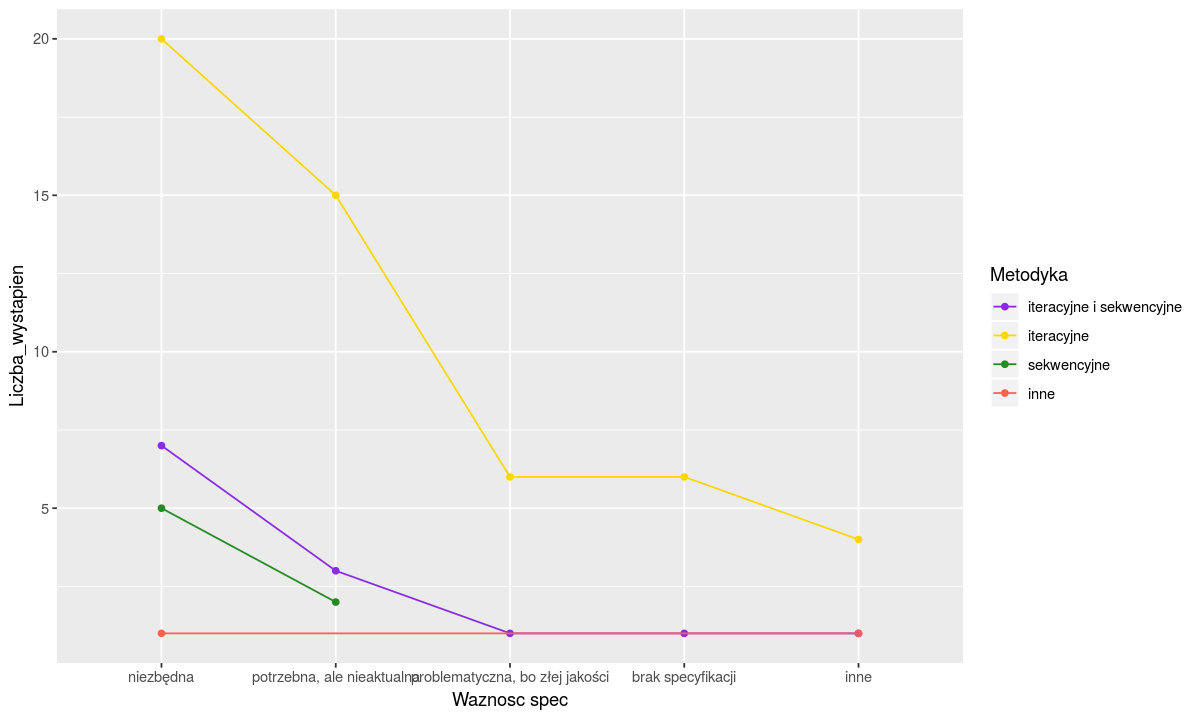

In [51]:
method_length_comb_table <- comb_freq_table("Waznosc_spec_norm", "Metodyka_norm")
method_length_comb_table
comb_freq_plot(method_length_comb_table, "Waznosc_spec_norm", "Metodyka_norm")

In [52]:
20/(20+15+6+6+4)*100
5/7*100

[1] 39.21569

[1] 71.42857

#TODO cos z tymi procentami musze zrobić

W projektach prowadzonych przy użyciu metodyk sekwencyjnych ankietowani zwykle doświadczali pozytywnego wpływu specyfikacji, choć zdarzały się przypadki, że dokument po jakimś czasie się deaktualizował. Nie było jednak przypadków, w których specyfikacja była tak niskiej jakości, że dokładała wręcz dodatkowej pracy potrzebnej na wyjaśnianie. W projektach iteracyjnych zdarzały się takie sytuacje. W tej grupie ankietowanych mniejszy był też procent ludzi zadowolonych z jakości specyfikacji (o 6% w porównaniu do wyników bez podziału na rodzaj metodyki prowadzenia projektów), choć w dalszym ciągu była to najczęstsza odpowiedź.

#### Ważność specyfikacji a czas trwania projektów

Waznosc spec,Dl projektu,Liczba_wystapien
niezbędna,do pół roku,4
niezbędna,"0,5 - 1 roku",8
niezbędna,1-3 lata,14
niezbędna,powyżej 3 lat,7
"potrzebna, ale nieaktualna",do pół roku,3
"potrzebna, ale nieaktualna","0,5 - 1 roku",6
"potrzebna, ale nieaktualna",1-3 lata,7
"potrzebna, ale nieaktualna",powyżej 3 lat,4
"problematyczna, bo złej jakości",do pół roku,2
"problematyczna, bo złej jakości","0,5 - 1 roku",1


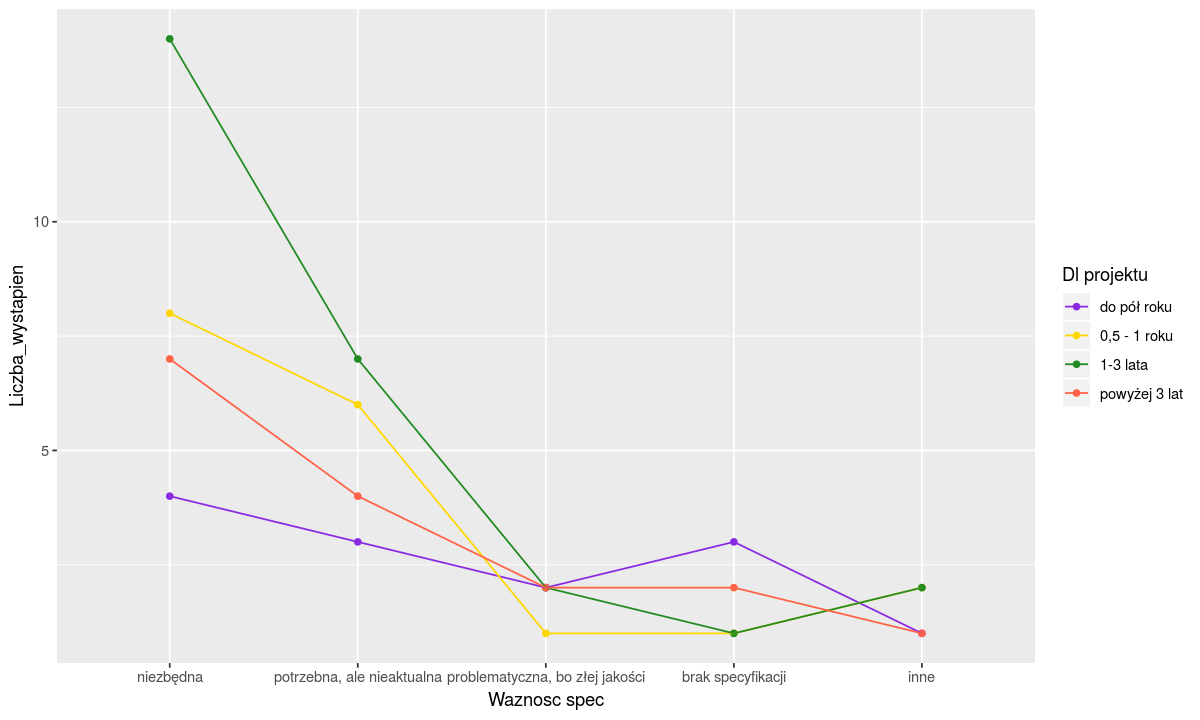

In [61]:
method_length_comb_table <- comb_freq_table("Waznosc_spec_norm", "Dl_projektu_norm")
method_length_comb_table
comb_freq_plot(method_length_comb_table, "Waznosc_spec_norm", "Dl_projektu_norm")

#### Ważność specyfikacji a udział testerów

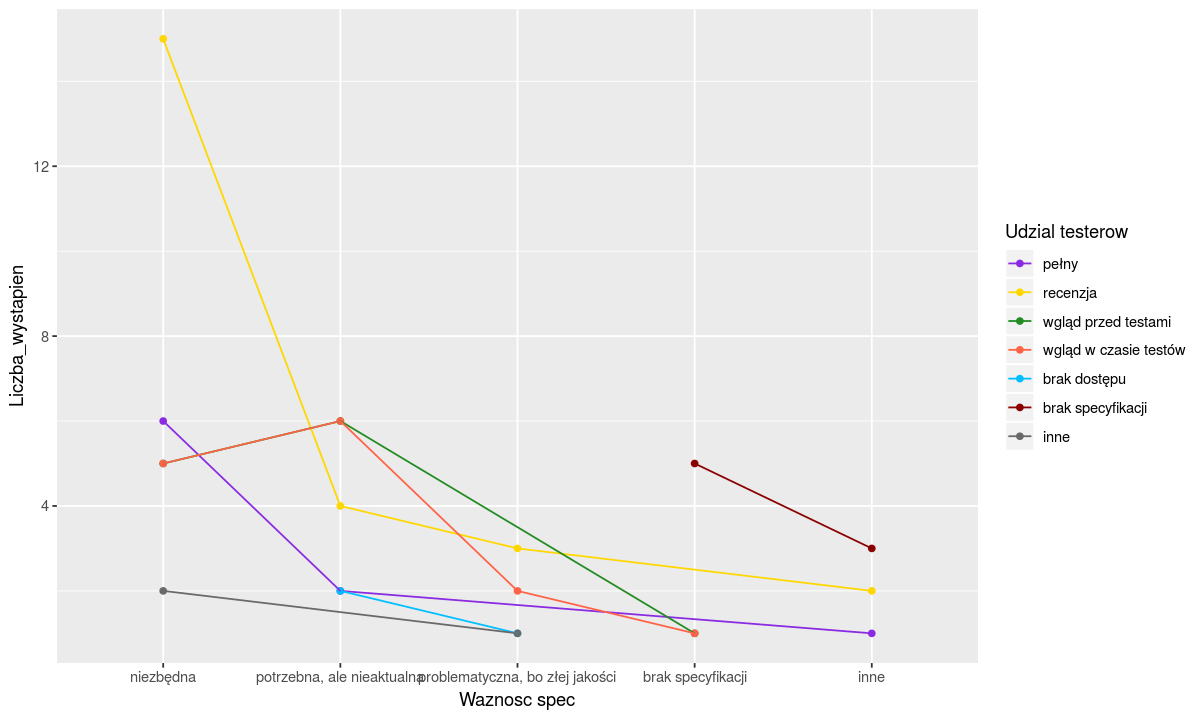

In [54]:
method_length_comb_table <- comb_freq_table("Waznosc_spec_norm", "Udzial_testerow_norm")
# method_length_comb_table
comb_freq_plot(method_length_comb_table, "Waznosc_spec_norm", "Udzial_testerow_norm")

#### Ważność specyfikacji a spisywanie wymagań

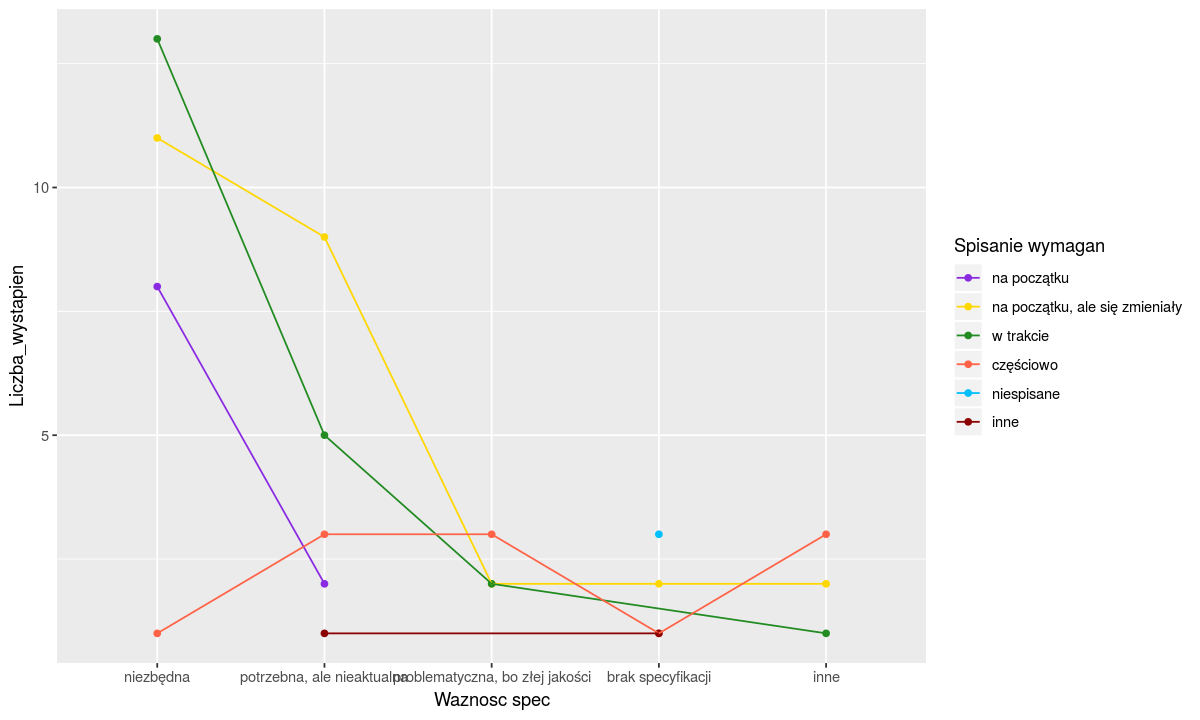

In [55]:
method_length_comb_table <- comb_freq_table("Waznosc_spec_norm", "Spisanie_wymagan_norm")
# method_length_comb_table
comb_freq_plot(method_length_comb_table, "Waznosc_spec_norm", "Spisanie_wymagan_norm")

#### Ważność specyfikacji a osoba odpowiedzialna

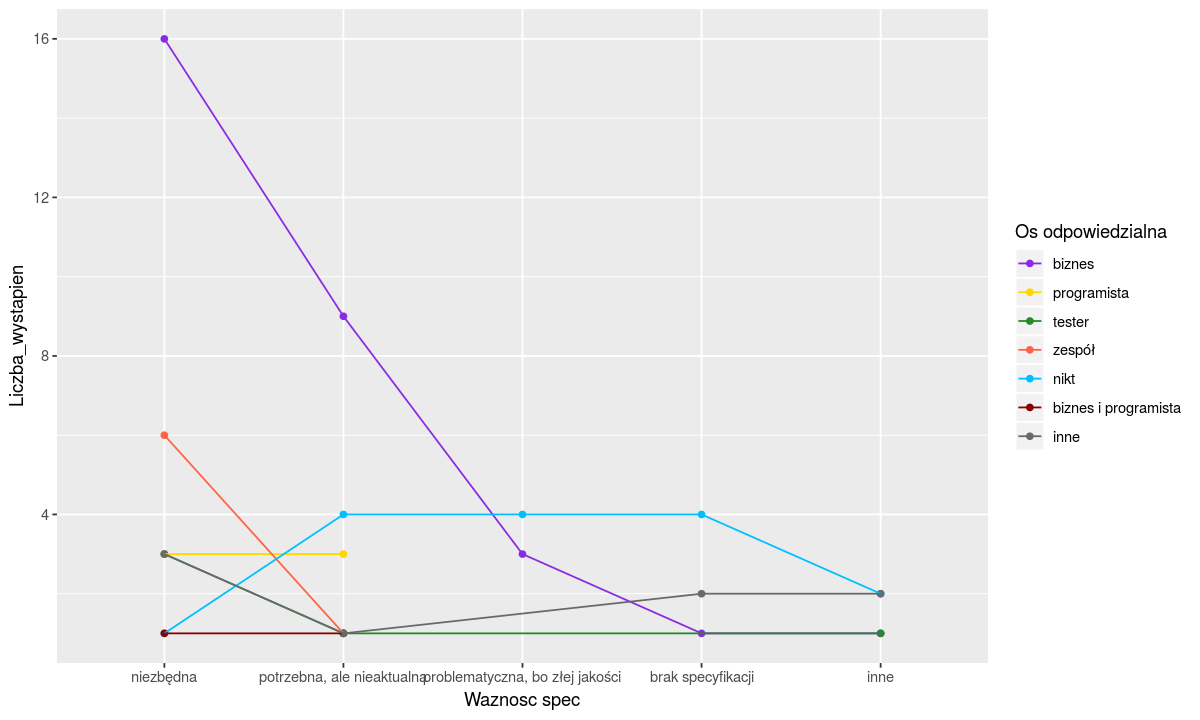

In [56]:
method_length_comb_table <- comb_freq_table("Waznosc_spec_norm", "Os_odpowiedzialna_norm")
# method_length_comb_table
comb_freq_plot(method_length_comb_table, "Waznosc_spec_norm", "Os_odpowiedzialna_norm")

#### Ważność specyfikacji a długość specyfikacji

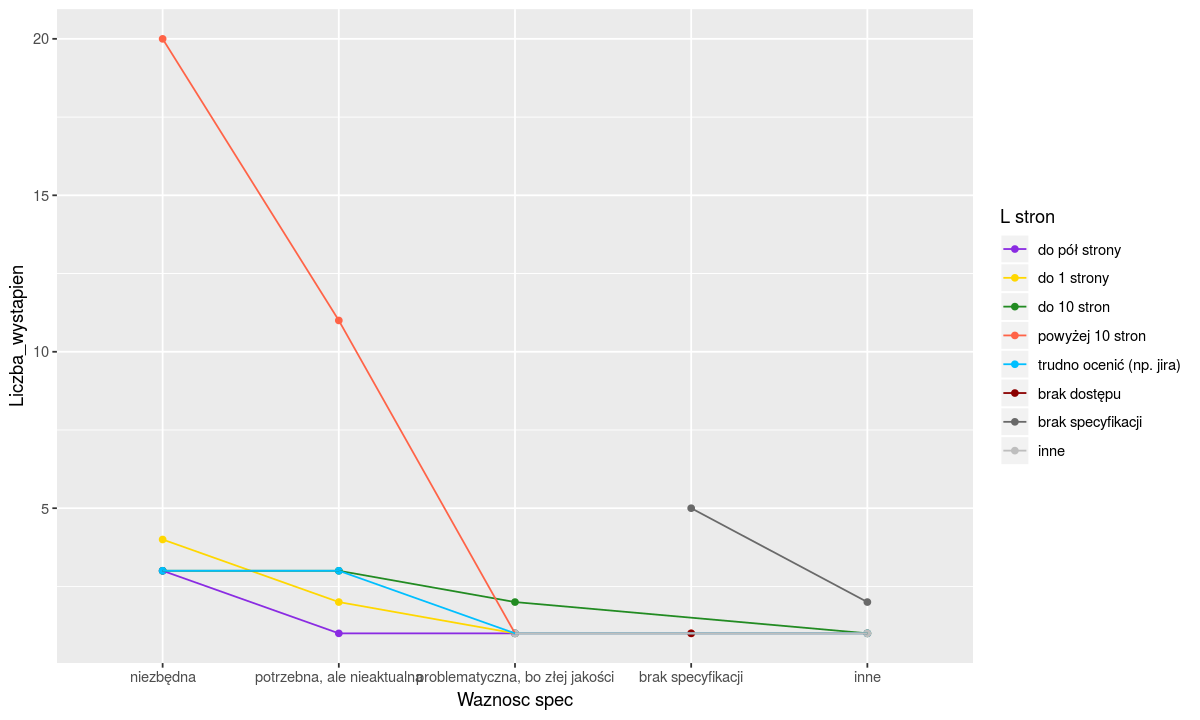

In [57]:
method_length_comb_table <- comb_freq_table("Waznosc_spec_norm", "L_stron_norm")
# method_length_comb_table
comb_freq_plot(method_length_comb_table, "Waznosc_spec_norm", "L_stron_norm")

In [58]:
# Ważny kod, ale na marginesie


# library(rbenchmark)

# benchmark(
#          "select"={
#     l <- filter(select(df, C_aktualnosc:C_zrozumialosc), df$C_koherencja, df$C_testowalnosc, df$C_zrozumialosc)         
#     lapply(l, sum)
#          },
#     "df"={
#     nrow(filter(df, df$C_koherencja, df$C_testowalnosc, df$C_zrozumialosc))
#     },
#     replications = 1000,
#     columns = c("test", "replications", "elapsed", "relative", "user.self", "sys.self")     
#          )


In [59]:
# head(df)

## Zmienne i relacje między zmiennymi

In [60]:
df %>% select(Udzial_testerow, Udzial_testerow_norm) %>% filter(Udzial_testerow_norm=="inne")

by_x <- group_by(df, Udzial_testerow, Udzial_testerow_norm)
arrange(summarise(by_x, n = n()), Udzial_testerow_norm)

Udzial_testerow,Udzial_testerow_norm
"I tak i nie - w niektórych projektach miałam user story i jakieś ogólne podstawy jak apka ma działac, a w innych totalne pustki",inne
"nie wiem, dołączyłem do projektu w trakcie",inne
Nie. Bo nie bylo testerow - nie byli potrzebni,inne


Udzial_testerow,Udzial_testerow_norm,n
"tak, brali udział w definiowaniu wymagań",pełny,9
"Coś między dwa a trzy - nie tyle do recenzji, ile był dostęp dość szybko i uwagi, które się nasunęły w czasie projektowania strategii i planów były brane pod uwagę.",recenzja,1
"gdy się zainteresowali, to mogli na cośwplynąć",recenzja,1
"tak, recenzowali gotową specyfikację i mogli wnosić swoje uwagi",recenzja,22
"specyfikacja częściowo dostępna na początku, zmienna i głównie rozszerzana w trakcie trwania projektu",wgląd przed testami,1
"tak, mieli wgląd do specyfikacji już na samym początku i na jej podstawie mogli stworzyć strategię i plan testów, ale nie mieli wpływu na zmianę samego dokumentu",wgląd przed testami,10
"wgląd od początku, ale bez wpływu na zmiany; natomiast klient zmiany wprowadzał cały czas, także już po oddaniu projektu!!",wgląd przed testami,1
"nie brali udziału w fazie projektowania wymagań, ale mieli pełny dostęp do specyfikacji w czasie testów",wgląd w czasie testów,1
"nie, mieli dostęp do specyfikacji, gdy oprogramowanie było w trakcie implementacji, albo nawet po jej zakończeniu",wgląd w czasie testów,13
nie i nie mieli dostępu do specyfikacji,brak dostępu,3


## Uwagi do ankiety i pomysły na przyszłość

1.  Słabym pomysłem było proszenie ankietowanych o odpowiedzi w oparciu o 3 ostatnie projekty (wiele informacji jest pomieszanych i nie można ich przeanalizować).
2. Warto by było sprawdzić, które cechy specyfikacji najczęściej są spotykane w rzeczywistych projektach a które najrzadziej (np. przez stopniowanie). W ten sposób można by było porównać oczekiwania z realiami. :) 